# Исследование объявлений о продаже квартир 

## Описание

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
<u>Нужно научиться определять рыночную стоимость объектов недвижимости.</u>   
Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Описательная-статистика" data-toc-modified-id="Описательная-статистика-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описательная статистика</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>is_apartment</a></span></li><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ceiling_height</a></span></li><li><span><a href="#floors_total" data-toc-modified-id="floors_total-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>floors_total</a></span></li><li><span><a href="#balcony" data-toc-modified-id="balcony-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>balcony</a></span></li><li><span><a href="#living_area" data-toc-modified-id="living_area-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>living_area</a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>kitchen_area</a></span></li><li><span><a href="#locality_name" data-toc-modified-id="locality_name-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>locality_name</a></span></li><li><span><a href="#days_exposition" data-toc-modified-id="days_exposition-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>days_exposition</a></span></li><li><span><a href="#parks_around3000,-ponds_around3000" data-toc-modified-id="parks_around3000,-ponds_around3000-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>parks_around3000, ponds_around3000</a></span></li><li><span><a href="#parks_nearest,-ponds_neares" data-toc-modified-id="parks_nearest,-ponds_neares-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>parks_nearest, ponds_neares</a></span></li><li><span><a href="#airports_nearest,-cityCenters_nearest" data-toc-modified-id="airports_nearest,-cityCenters_nearest-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>airports_nearest, cityCenters_nearest</a></span></li><li><span><a href="#rooms" data-toc-modified-id="rooms-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>rooms</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади" data-toc-modified-id="Соотношение-жилой-и-общей-площади-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади</a></span></li><li><span><a href="#Соотношение-площади-кухни-к-общей" data-toc-modified-id="Соотношение-площади-кухни-к-общей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Соотношение площади кухни к общей</a></span></li><li><span><a href="#Столбец-с-расстоянием-до-центра-в-километрах-(для-4.6)" data-toc-modified-id="Столбец-с-расстоянием-до-центра-в-километрах-(для-4.6)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Столбец с расстоянием до центра в километрах (для 4.6)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков.</a></span><ul class="toc-item"><li><span><a href="#Гистограмма-площади" data-toc-modified-id="Гистограмма-площади-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Гистограмма площади</a></span></li><li><span><a href="#Гистограмма-цены" data-toc-modified-id="Гистограмма-цены-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Гистограмма цены</a></span></li><li><span><a href="#Гистрограмма-и-круговая-диаграмма-числа-комнат" data-toc-modified-id="Гистрограмма-и-круговая-диаграмма-числа-комнат-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Гистрограмма и круговая диаграмма числа комнат</a></span></li><li><span><a href="#Гистограмма-высоты-потолков" data-toc-modified-id="Гистограмма-высоты-потолков-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Гистограмма высоты потолков</a></span></li></ul></li><li><span><a href="#Изучите-время-продажи-квартиры" data-toc-modified-id="Изучите-время-продажи-квартиры-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Изучите время продажи квартиры</a></span><ul class="toc-item"><li><span><a href="#Гиcтограмма-времени-продажи-квартир" data-toc-modified-id="Гиcтограмма-времени-продажи-квартир-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Гиcтограмма времени продажи квартир</a></span></li><li><span><a href="#Среднее-и-медиана" data-toc-modified-id="Среднее-и-медиана-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Среднее и медиана</a></span></li><li><span><a href="#Cколько-обычно-занимает-продажа?" data-toc-modified-id="Cколько-обычно-занимает-продажа?-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Cколько обычно занимает продажа?</a></span></li><li><span><a href="#Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li></ul></li><li><span><a href="#Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили." data-toc-modified-id="Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</a></span><ul class="toc-item"><li><span><a href="#Особенности-редких-и-выбивающихся-значений-для-days_exposition" data-toc-modified-id="Особенности-редких-и-выбивающихся-значений-для-days_exposition-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Особенности редких и выбивающихся значений для days_exposition</a></span></li></ul></li><li><span><a href="#Факторы-влияния-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияния-на-стоимость-квартиры-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Факторы влияния на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Карта-корреляции" data-toc-modified-id="Карта-корреляции-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Карта корреляции</a></span></li><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-числа-комнат" data-toc-modified-id="Зависимость-цены-от-числа-комнат-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Зависимость цены от числа комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-5.4.4"><span class="toc-item-num">5.4.4&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом-5.4.5"><span class="toc-item-num">5.4.5&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Зависимость-цены-от-даты-размещения:-дня-недели,-месяца-и-года-5.4.6"><span class="toc-item-num">5.4.6&nbsp;&nbsp;</span>Зависимость цены от даты размещения: дня недели, месяца и года</a></span><ul class="toc-item"><li><span><a href="#день-недели" data-toc-modified-id="день-недели-5.4.6.1"><span class="toc-item-num">5.4.6.1&nbsp;&nbsp;</span>день недели</a></span></li><li><span><a href="#месяц" data-toc-modified-id="месяц-5.4.6.2"><span class="toc-item-num">5.4.6.2&nbsp;&nbsp;</span>месяц</a></span></li><li><span><a href="#год" data-toc-modified-id="год-5.4.6.3"><span class="toc-item-num">5.4.6.3&nbsp;&nbsp;</span>год</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населённых-пунктов-с-наибольшим-числом-объявлений-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>10 населённых пунктов с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Средняя-цена-квадратного-метра-в-этих-населённых-пунктах" data-toc-modified-id="Средняя-цена-квадратного-метра-в-этих-населённых-пунктах-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Средняя цена квадратного метра в этих населённых пунктах</a></span></li><li><span><a href="#Населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья" data-toc-modified-id="Населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Населённые пункты с самой высокой и низкой стоимостью жилья</a></span></li></ul></li><li><span><a href="#Изучите-предложения-квартир" data-toc-modified-id="Изучите-предложения-квартир-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Изучите предложения квартир</a></span></li><li><span><a href="#Cегмент-квартир-в-центре" data-toc-modified-id="Cегмент-квартир-в-центре-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Cегмент квартир в центре</a></span><ul class="toc-item"><li><span><a href="#Площадь-в-центре" data-toc-modified-id="Площадь-в-центре-5.8.1"><span class="toc-item-num">5.8.1&nbsp;&nbsp;</span>Площадь в центре</a></span></li><li><span><a href="#Цена-в-центре" data-toc-modified-id="Цена-в-центре-5.8.2"><span class="toc-item-num">5.8.2&nbsp;&nbsp;</span>Цена в центре</a></span></li><li><span><a href="#Число-комнат-в-центре" data-toc-modified-id="Число-комнат-в-центре-5.8.3"><span class="toc-item-num">5.8.3&nbsp;&nbsp;</span>Число комнат в центре</a></span></li><li><span><a href="#Высота-потолков-в-центре" data-toc-modified-id="Высота-потолков-в-центре-5.8.4"><span class="toc-item-num">5.8.4&nbsp;&nbsp;</span>Высота потолков в центре</a></span></li><li><span><a href="#Карта-корреляции-для-центра" data-toc-modified-id="Карта-корреляции-для-центра-5.8.5"><span class="toc-item-num">5.8.5&nbsp;&nbsp;</span>Карта корреляции для центра</a></span></li><li><span><a href="#Зависимость-от-числа-комнат" data-toc-modified-id="Зависимость-от-числа-комнат-5.8.6"><span class="toc-item-num">5.8.6&nbsp;&nbsp;</span>Зависимость от числа комнат</a></span></li><li><span><a href="#Зависимость-от-удаленности-от-центра" data-toc-modified-id="Зависимость-от-удаленности-от-центра-5.8.7"><span class="toc-item-num">5.8.7&nbsp;&nbsp;</span>Зависимость от удаленности от центра</a></span></li><li><span><a href="#Зависимость-от-этажа-квартиры" data-toc-modified-id="Зависимость-от-этажа-квартиры-5.8.8"><span class="toc-item-num">5.8.8&nbsp;&nbsp;</span>Зависимость от этажа квартиры</a></span></li><li><span><a href="#Зависимость-от-даты-размещения-объявления" data-toc-modified-id="Зависимость-от-даты-размещения-объявления-5.8.9"><span class="toc-item-num">5.8.9&nbsp;&nbsp;</span>Зависимость от даты размещения объявления</a></span><ul class="toc-item"><li><span><a href="#день-недели" data-toc-modified-id="день-недели-5.8.9.1"><span class="toc-item-num">5.8.9.1&nbsp;&nbsp;</span>день недели</a></span></li><li><span><a href="#месяц" data-toc-modified-id="месяц-5.8.9.2"><span class="toc-item-num">5.8.9.2&nbsp;&nbsp;</span>месяц</a></span></li><li><span><a href="#год" data-toc-modified-id="год-5.8.9.3"><span class="toc-item-num">5.8.9.3&nbsp;&nbsp;</span>год</a></span></li></ul></li><li><span><a href="#Cколько-обычно-занимает-продажа?" data-toc-modified-id="Cколько-обычно-занимает-продажа?-5.8.10"><span class="toc-item-num">5.8.10&nbsp;&nbsp;</span>Cколько обычно занимает продажа?</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<font size="4"><b>Описание данных:</b></font>

<b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)  
<b>balcony</b> — число балконов  
<b>ceiling_height</b> — высота потолков (м)  
<b>cityCenters_nearest</b> — расстояние до центра города (м)  
<b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)  
<b>first_day_exposition</b> — дата публикации  
<b>floor</b> — этаж  
<b>floors_total</b> — всего этажей в доме  
<b>is_apartment</b> — апартаменты (булев тип)  
<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)  
<b>last_price</b> — цена на момент снятия с публикации  
<b>living_area</b> — жилая площадь в квадратных метрах (м²)  
<b>locality_name</b> — название населённого пункта  
<b>open_plan</b> — свободная планировка (булев тип)  
<b>parks_around3000</b> — число парков в радиусе 3 км  
<b>parks_nearest</b> — расстояние до ближайшего парка (м)  
<b>ponds_around3000</b> — число водоёмов в радиусе 3 км  
<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)  
<b>rooms</b> — число комнат  
<b>studio</b> — квартира-студия (булев тип)  
<b>total_area</b> — площадь квартиры в квадратных метрах (м²)  
<b>total_images</b> — число фотографий квартиры в объявлении  

## Изучение данных из файла

### Импорт библиотек и загрузка данных

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<font color='orange'><b>🙊 Наблюдения 01</b></font>

- first_day_exposition имеет вид Y-M-DT00:00:00 для всех значений  + описание столбца - "дата публикации". Соотвественно, можно сделать вывод, что время не важно для этого df
- очень много пропущенных значений в некоторых столбцах

In [3]:
#посмотрим сколько НЕ пустых строк в каждой колонке df-ма

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<font color='orange'><b>🙊 Наблюдения 02</b></font>

- first_day_exposition имеет тип данных object, хотя это дата. Нужно переформатировать в datetime.  
- floors_total: float64 -> int, так как этажей всегда целое число
- is_apartment: в описании сказано, что это bool, тут же это object. Поменяем в будущем.
- balcony: float64 -> int, так как балконов всегда целое число
- parks_around3000 и ponds_around3000: float64 -> int, так как количество прудов и парков всегда целое число
- days_exposition: float64 -> int, так как число дней не может быть не целым
- last_price: так как цены на квартиры оч большие, они обычно без копеек -> int

In [4]:
# выведем столбцы, где есть пропущенные значения 

for column in df.columns:
    if df[column].count() != df.shape[0]:
        print(f'В {column} пропущенных строк: {df.shape[0] - df[column].count()}, {round(((df[column].isnull().sum())/df.shape[0])*100, 2)}%')

В ceiling_height пропущенных строк: 9195, 38.8%
В floors_total пропущенных строк: 86, 0.36%
В living_area пропущенных строк: 1903, 8.03%
В is_apartment пропущенных строк: 20924, 88.29%
В kitchen_area пропущенных строк: 2278, 9.61%
В balcony пропущенных строк: 11519, 48.61%
В locality_name пропущенных строк: 49, 0.21%
В airports_nearest пропущенных строк: 5542, 23.38%
В cityCenters_nearest пропущенных строк: 5519, 23.29%
В parks_around3000 пропущенных строк: 5518, 23.28%
В parks_nearest пропущенных строк: 15620, 65.91%
В ponds_around3000 пропущенных строк: 5518, 23.28%
В ponds_nearest пропущенных строк: 14589, 61.56%
В days_exposition пропущенных строк: 3181, 13.42%


<font color='orange'><b>🙊 Наблюдения 03</b></font>

Много пропущенных строк в колонках is_apartment (88.29%), balcony (48.61%), parks_nearest (65.91%), ponds_nearest (61.56%).  
Так же есть столбцы, где почти одинаковый процент пропущенных данных (23.3-23.4%):  
- airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 (данные, внесенные системой автоматически!)

### Описательная статистика

In [5]:
# так как столбцов много, будем рассматривать их, группируя по типу данных
# описание строковых столбцов

df.describe(include=[object])

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


<font color='orange'><b>🙊 Наблюдения 04</b></font>

- first_day_exposition - нужно исправить на datetime тип. Можно заметить, что уникальных значений всего 6.3% (1491/23699), а значит если бы где-то было время, то уникальных значений было бы гораздо больше. Значит, время 00:00:00 точно можно удалить.  Так же видно, что 368 объявлений было размешено 01.02.2018 года.   
- is_apartment — нужно исправить на булевый тип (или создать новый столбец для таких значений, где True = 1, False = 0). Пока видно, что в столбце два уникальных значения (True и False наверняка). Значений мало и большинство - не апартаменты.  
- locality_name — видно, что большинство квартир находяться в Питере.

In [6]:
# описание столбцов с целыми числами

df.describe(include=[int])

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


<font color='orange'><b>🙊 Наблюдения 05</b></font>

- total_images — среднее и медианное число фотографий квартиры в объявлении почти одинаковое - 9 шт. Можно предположить, что в данных нет выбросов, но стандартное отклонение достаточно большое, что может говорить о большой вариабильности количества фотографий.  
- rooms — мин число комнат = 0, чего быть не может (согласно <a href="https://www.pereplanirovkamos.ru/normativnaya-ploshchad-pomeshcheniy-kvartiry.html">Количество комнат vs total_area</a>). Ну и 19 комнат смотрится странно. Изучим данные позже.  
- floor — тут я не вижу странностей, кроме различия почти в 2 этажа между медианной и средним.  

In [7]:
# описание булевых столбцов 

df.describe(include=[bool])

,studio,open_plan
count,23699,23699
unique,2,2
top,False,False
freq,23550,23632


<font color='orange'><b>🙊 Наблюдения 06</b></font>

- studio — мы видим, что большинство квартир - не студии
- open_plan — видно, что у большинства квартир нет возможности свободной планировки

In [8]:
# описание числовых столбцов с плавающей точкой

df.describe(include=[float])

,last_price,total_area,ceiling_height,floors_total,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2.369900e+04,23699.000000,14504.000000,23613.000000,21796.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,6.541549e+06,60.348651,2.771499,10.673824,34.457852,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,1.088701e+07,35.654083,1.261056,6.597173,22.030445,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,1.219000e+04,12.000000,1.000000,1.000000,2.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,3.400000e+06,40.000000,2.520000,5.000000,18.600000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,4.650000e+06,52.000000,2.650000,9.000000,30.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,6.800000e+06,69.900000,2.800000,16.000000,42.300000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,7.630000e+08,900.000000,100.000000,60.000000,409.700000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<font color='orange'><b>🙊 Наблюдения 07</b></font>

- last_price — среднее и медианна цены на момент снятия с публикации отличаются примерно на 2 млн, что в принципе не очень много, понимая цену квартир. Но если обратить внимание, что мин значение меньше миллиона, то стоит обратить внимание на выбросы в этой колонке.  
- total_area — мин площадь квартиры кажется больно маленькой, но изучив ЖК РФ (<a href="https://www.zakonrf.info/jk/106/">Статья 106 ЖК РФ</a>), узнала, что мин жилая площадь  - 6 м². В общую площадь входит (согласно <a href="https://www.eduklgd.ru/interesnoe/chto-vklyuchaetsya-v-ploshhad-zhilogo-pomeshheniya.html">Что включается в площадь жилого помещения</a>): комнаты, ванная и туалет, кухня, кладовка и так далее. Значит, будем отталкиваться от того, что вся квартира в 12 м² - нормально. Смущает квартира с площадью 900 м² (страшно представить, если это частный дом и люди там сами убираются), нужно будет изучить эти данные. По данным можно сказать, что большинство объявлений - 2-х комнатные квартиры.  
- ceiling_height — максимальная высота потолков в России за всю историю - 10 м (<a href="https://www.dp.ru/a/2016/10/27/Dostich_potolka">Деловой Питербург: Достичь потолка</a>, <a href="https://pod-potol.com/remont-i-ukhod/oformlenie/kakaya-standartnaya-vysota-potolkov-v-kvartire-normy-i-standarty-dlya-raznykh-vidov-zdaniy.html">Стандартная высота потолков в квартире</a>), поэтому максимальное значение 100 метров (даже для двухэтажных квартир или отдельного дома) и мин - 1 метр - крайне маловероятно (<a href="https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%A1%D0%B5%D0%B3%D0%BE%D0%B4%D0%BD%D1%8F%20%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BD%D0%BE%D1%80%D0%BC%D0%BE%D0%B9%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%BF%D1%80%D0%B5%D0%B2%D1%8B%D1%88%D0%B0%D1%82%D1%8C%203%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0">Оптимальная высота потолка</a>). Медианное и среднее значение соотвествует стандартной высоте потолков и почти не отличаются, что может говорить нам о том, что выбросов мало.  
- floors_total — самое высокое здание в Питере - Лахта Центр (<a href="http://neboskreb.info/lakhta-center-peterburg/">Небоскрёбы мира</a>), где есть 83 этажа. Соответсвенно, максимальная высота в 60 этажей - вполне вероятно. Половина объявлений - квартиры из 9 -10-ти этажного дома. Стандартная высота в наших краях.  
- living_area — как я и писала раньше, мин жилая площадь - 6 м², соответсвенно, мин значение меньше 6 м² не может быть. Так же, жилая площадь (согласно <a href="https://www.eduklgd.ru/interesnoe/chto-vklyuchaetsya-v-ploshhad-zhilogo-pomeshheniya.html">Что включается в площадь жилого помещения</a>) - это только гостинные и спальни. Запомним это.     
- kitchen_area — мин площадь кухни - 5 м² (<a href="https://stz-irk.com/minimalnaya-ploschad-kuhni-snip/">Минимальная площадь кухни СНИП</a>). Кухня в 112 м² - прям мощно. Будем изучать эти данные.  
- balcony — смущает только 5 балконов, проверим эти данные позже.  
- airports_nearest — проверила по навигатору - от центра Питера до пос. Сиверский (Лен. область) ~ 79 км. Коррелируется с максимальным значением. А вот к мин вопросы - уверена, что не может быть 0 метров до до ближайшего аэропорта. Так же, если верить, что от центра Питера до Пулково 20.6 км, то можно сделать вывод, что большинство квартир находяться севернее центра (например Мурино).  
- cityCenters_nearest — в расстояние до центра города (м) - пока не вижу ничего странного.  
- parks_around3000 (число парков в радиусе 3 км) — аналогично с cityCenters_nearest.   
- parks_nearest — 1 м до ближайшего парка странновато.  
- ponds_around3000 — если сравнивать с парками, можно предположить, что где-то есть водоём в радиусе 3 км без парка или два водоемы в одном парке.  
- ponds_nearest — если сравнивать с парками, расстояние до ближайшего водоёма(м) чуть больше, чем до парка. Возможно, все-таки все водоемы находятся в парках.  
- days_exposition — некоторые квартиры пытались продать больеш 4-х лет, не знаю, возможно ли такое. Будем проверять. Так же видно большую разницу между медианой и средним - будем искать выбросы.

### Вывод

1) Обнаружили столбцы, где пропущено более 50% данных -> детально изучим их и попрообуем заполнить адекватно  
2) Обнаружили несоответсвие типов и смысла данных в нескольких столбцах -> будем исправлять  
3) Обнаружили аномальные значения описательной статистики -> будем изучать и исправлять  

P.S. Очень много столбцов с данными, лично меня пока пугает данный DataFrame. Будем пытаться разложить все данные пополочкам.

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Предобработка данных

- Определите и изучите пропущенные значения:  
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов —  скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.  
Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.  Укажите причины, которые могли привести к пропускам в данных. 

- Приведите данные к нужным типам:  
Поясните, в каких столбцах нужно изменить тип данных и почему. 


<font color='orange'><b>🙊 Наблюдения 08</b></font>

Еще раз посмотрим на количество пустых значений


In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### is_apartment

<font color='orange'><b>🙊 Наблюдения 08.1</b></font>

Начнем с самого большого количества пропущенных данных - столбец is_apartment.  
Так как апартаменты в основном подходят для сдачи квартиры (согласно <a href="http://artek-ekb.ru/news/apartamenty-i-kvartira-v-cem-raznica/#:~:text=%D0%93%D0%BB%D0%B0%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B%20%D0%B8%20%D0%B0%D0%BF%D0%B0%D1%80%D1%82%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2,%D1%81%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%20%D0%B6%D0%B8%D0%BB%D1%8C%D1%8F(%D0%B2%20%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D0%B8)">Апартаменты или квартира - Что же лучше?</a>), то могу предположить, что такой покупкой заинтерисовано мало людей и все пропущенные значения можно отнести к False. Плюс, я уверена, что многие (как и я), не знают (а теперь знали 🐼) что такое апартаменты и просто пропускали эти значения. Те, кто знал - ставили True или False.    
Изучим данные, чтобы понять что можно сделать с пропущенными значениями.

In [10]:
#создадим функцию, которая будет выводить количевство пустных значений и частоту повторов не пустых значений в данных

def empty_vs_full_count(column):
    print(f'Количество NaN в столбце {column}: {df[column].isnull().sum()}')
    print('TOP:')
    print(df[column].value_counts().head())
    if df[column].value_counts().shape[0] >= 10:
        print('Top 5 - TAIL:')
        print(df[column].value_counts().tail())

In [11]:
empty_vs_full_count('is_apartment')

Количество NaN в столбце is_apartment: 20924
TOP:
False    2725
True       50
Name: is_apartment, dtype: int64


In [12]:
# посмотрим на строки в конце df, где есть пустые значения в столбце 'is_apartment'

df[df['is_apartment'].isna()].tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# посмотрим на строки в конце df, где значения в столбце 'is_apartment' is False

df.query('is_apartment == False').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,NaN,6.0,18.2,1,False,...,14.6,0.0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131.0
23667,14,9990000.0,90.0,2017-01-23T00:00:00,3,3.06,17.0,55.0,9,False,...,11.0,2.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,86.0
23671,3,3450000.0,35.3,2017-04-14T00:00:00,1,2.50,9.0,17.5,4,False,...,7.5,2.0,Санкт-Петербург,21435.0,15261.0,1.0,334.0,1.0,232.0,21.0
23678,10,3500000.0,43.0,2016-05-19T00:00:00,2,2.50,3.0,26.1,2,False,...,4.9,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0
23682,11,2350000.0,35.6,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.3,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0


<font color='orange'><b>🙊 Наблюдения 08.1.1</b></font>

Я не увидела никаких закономерностей, поэтому поменяю все NaN значения на False.

In [14]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [15]:
#check

empty_vs_full_count('is_apartment')

Количество NaN в столбце is_apartment: 0
TOP:
False    23649
True        50
Name: is_apartment, dtype: int64


### ceiling_height

<font color='orange'><b>🙊 Наблюдения 08.2</b></font>

Дальше - столбец ceiling_height (высота стен). Как мне кажется, важная информация, но даже я не знаю какой высоты у меня в квартире стены. Предполагаю, что большинство так же этого не знает. Предполагаю, что высота зависит от типа квартир (<a href="https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BB%D0%B8%D0%BD%D0%BA%D0%B0#:~:text=%D0%9D%D0%B0%20%D0%BB%D0%B5%D1%81%D1%82%D0%BD%D0%B8%D1%87%D0%BD%D0%BE%D0%B9%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D0%BA%D0%B5%20%D1%81%D1%82%D0%B0%D0%BB%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%20%D0%B4%D0%BE%D0%BC%D0%B0,%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2%20%E2%80%94%202%2D5%20%D1%8D%D1%82%D0%B0%D0%B6%D0%B5%D0%B9">сталинка</a>, <a href="https://ru.wikipedia.org/wiki/%D0%A5%D1%80%D1%83%D1%89%D1%91%D0%B2%D0%BA%D0%B0#:~:text=%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0%20%D0%BF%D0%BE%D0%B4%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%89%D0%B5%D0%B3%D0%BE%20%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%BD%D1%81%D1%82%D0%B2%D0%B0%20%D1%85%D1%80%D1%83%D1%89%D1%91%D0%B2%D0%BE%D0%BA%20%E2%80%94%204,%D0%BD%D0%B5%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85%20%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%B0%D1%85%20%D0%B8%20%D0%BD%D0%B0%20%D0%BE%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D0%B0%D1%85">хрущевки</a>, <a href="http://www.oazis54.ru/press/articles/32#:~:text=%D0%A1%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D0%B0%20%D1%81%D0%B5%D1%80%D0%B8%D0%B8%20%D0%BF%D0%B0%D0%BD%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2%20%D0%BF%D0%BE%D0%B7%D0%B2%D0%BE%D0%BB%D1%8F%D0%BB%D0%B8,%D1%86%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%BC%2C%20%D1%85%D0%BE%D1%82%D1%8F%20%D0%B1%D1%8B%D0%B2%D0%B0%D1%8E%D1%82%20%D0%B8%20%D1%82%D0%B0%D0%BA%D0%B8%D0%B5">панельные дома</a> и т.д.).   
Соответсвенно, я планирую добавить медианное значение (или среднее) для каждого пропущеного значения, группируя данные по высоте домов.  
Тут конечно проблема, что есть данные, где пропущена высота домов (floors_total - 0.36%). Но думаю, можно их или удалить (так как их мало) или заменить на медиану, где пропущена и floors_total и ceiling_height.

In [16]:
empty_vs_full_count('ceiling_height')

Количество NaN в столбце ceiling_height: 9195
TOP:
2.5    3515
2.6    1646
2.7    1574
3.0    1112
2.8     993
Name: ceiling_height, dtype: int64
Top 5 - TAIL:
27.50     1
5.00      1
3.59      1
4.80      1
100.00    1
Name: ceiling_height, dtype: int64


In [17]:
# проверим какой процент строк, где и этажность и высота стен NaN

print(round((df.query('ceiling_height == "NaN" and floors_total == "NaN"').shape[0]/df.shape[0])*100, 2), "%")

0.32 %


<font color='orange'><b>🙊 Наблюдения 08.2.1</b></font>

Выходит, сильно ситуацию не спасет замена (0.36% -> 0.32%), но для тренировки заменим значения у ceiling_height на медиану там где нет этажности. 

In [18]:
# посмотрим, как соотносится этажность и высота потолков
    
floors_vs_wall_height = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'mean', 'count']) 
floors_vs_wall_height.columns = ['median', 'mean', 'count'] 
floors_vs_wall_height = floors_vs_wall_height.round(2)
print(f"TOP {floors_vs_wall_height.head()}")
print(f"TAIL {floors_vs_wall_height.tail()}")

TOP               median  mean  count
floors_total                     
1.0             2.80  2.74     10
2.0             2.70  3.01    215
3.0             2.80  2.97    399
4.0             3.00  2.99    789
5.0             2.55  2.79   3666
TAIL               median   mean  count
floors_total                      
35.0            2.70   2.71      8
36.0           14.85  14.85      2
37.0            1.75   1.75      1
52.0            2.65   2.65      1
60.0            2.88   2.88      1


In [19]:
# посмотрим как часто встречаются значения больше 10 и какие

high_walls = df[df['ceiling_height'] > 10]
high_walls['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
22.6     1
10.3     1
100.0    1
27.5     1
20.0     1
14.0     1
26.0     1
24.0     1
Name: ceiling_height, dtype: int64

In [20]:
# посмотрим как часто встречаются значения меньше 2.4 и какие

low_walls = df[df['ceiling_height'] < 2.4]
low_walls['ceiling_height'].value_counts()

2.00    11
2.30     4
2.20     1
2.34     1
1.20     1
1.00     1
2.25     1
1.75     1
Name: ceiling_height, dtype: int64

<font color='orange'><b>🙊 Наблюдения 08.2.2</b></font>

Думаю, тут произошло несколько ошибок - люди забывали ставить запятую (27 -> 2.7 м), другие ставили по ощущениям (меньше 2,4 м, возможно это были люди низкого роста).  
Медианное значение не совсем показывает различия между высотой домов (к примеру медиана одинаковая у 5-ти этажного, 9-ти этажного домов), поэтому будем ориентироваться на среднее.  
Соответсвенно, мы будем менять двузначные числа на однозначное с запятой, менять значения меньше 2.4 м на 0, менять пустые значения на среднее в зависимости от этажности здания и, в конце, где нет этажности или высота стен = 0 -> заменим значения на медиану.

In [21]:
# уменьшаем на десятку все значения, больше 10 и все значения меньше 2.4 заменяем на ноль

df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height']/10
df.loc[df['ceiling_height'] < 2.4, 'ceiling_height'] = 0

# цикл, который заменяет значения высоты потолка в пустых строчках на среднее в зависимости от этажности  

for floor in floors_vs_wall_height.index:
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floor), 'ceiling_height'] = floors_vs_wall_height.loc[floor, 'mean']

# заменяем 0 на медиану
# заменяем оставшиеся пустые значения на медиану
# у меня почему-то возникли проблемы со значением 14.85 (никак не хотело меняться), поэтому добавила его отдельно   
    
df['ceiling_height'] = df['ceiling_height'].replace(0, df['ceiling_height'].median())    
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'] = df['ceiling_height'].replace(14.85, df['ceiling_height'].median()) 

In [22]:
#check

print(f"Пустых значений: {df['ceiling_height'].isna().sum()}")

if df[df['ceiling_height'] > 10].shape[0] == 0 and df[df['ceiling_height'] < 2.4].shape[0] == 0:
    print("OK")
else:
    print('NOK')

Пустых значений: 0
OK


### floors_total

<font color='orange'><b>🙊 Наблюдения 08.3</b></font>

Дальше - столбец floors_total.  
Всего пустых 0.36% данных высоты домов. Мы заменили для 0.04% данных соответсвующее значение в столбце ceiling_height, но для этого столбца особо от этого толку нет. Так как мне не по чему отталкиваться для определения этажности пропущенных строк и данных мало, будем их удалять.

In [23]:
# создадим функцию для сводной таблицы

def one_vs_two(column_1, column_2):
    data = df.pivot_table(index=column_1, values=column_2, aggfunc=['median', 'mean', 'count']) 
    data.columns = ['median', 'mean', 'count'] 
    data = data.round(2)
    print(data)

In [24]:
empty_vs_full_count("floors_total")

Количество NaN в столбце floors_total: 86
TOP:
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64
Top 5 - TAIL:
60.0    1
33.0    1
52.0    1
37.0    1
34.0    1
Name: floors_total, dtype: int64


In [25]:
# удалим пустые значения

df.dropna(axis=0, subset=['floors_total'], inplace=True)

- - - - - - - - -  -

In [26]:
# проверим, сколько пустых данных осталось и где

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

### balcony

<font color='orange'><b>🙊 Наблюдения 08.4</b></font>

Дальше - столбец balcony.  
В описании вначале нам дали понять, что если пропущено значение, то скорее всего это значит, что балкона нет. Мне кажется, что возможна связь между количеством балконов и общею площадью или количеством комнат.
Проверим.

In [27]:
empty_vs_full_count("balcony")

Количество NaN в столбце balcony: 11480
TOP:
1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
Name: balcony, dtype: int64


In [28]:
# посмотрим, как соотносяться количество балконов и площадь квартиры

one_vs_two('balcony', 'total_area')

         median   mean  count
balcony                      
0.0        52.1  61.73   3713
1.0        48.5  57.15   4195
2.0        52.0  56.00   3657
3.0        74.4  88.08     81
4.0        75.0  81.43    183
5.0        71.8  80.84    304


In [29]:
# посмотрим, как соотносяться количество балконов и комнат

one_vs_two('balcony', 'rooms')

         median  mean  count
balcony                     
0.0           2  2.13   3713
1.0           2  2.00   4195
2.0           2  1.84   3657
3.0           3  2.99     81
4.0           3  2.64    183
5.0           3  2.70    304


<font color='orange'><b>🙊 Наблюдения 08.4.1</b></font>

Ну, прям яркой завиисмости нет. Можно сказать, что среднем квартиры с 1-2 комнатами продаются с 2 балконами, 3-5 комант - с тремя. Ну и по метражу, можно понять, что квартины с общей площадью до 60 - 65 кв. м - 2х комнатные квартиры, больше и до 90 кв. м -  трехкомнатные.  
Значит, меняем NaN на 0.

In [30]:
df['balcony'] = df['balcony'].fillna(0)

In [31]:
# check

df['balcony'].isna().sum()

0

### living_area

<font color='orange'><b>🙊 Наблюдения 08.5</b></font>

Дальше - столбец living_area (8.03%)  
Возможно, пропуски тут есть, потому что люди заполняли total_area (так как в столбце нет ни одного пропущенного значения) и забивали на расчет сколько там жилой площади.  
Квартиры настолько разные, что делать предположения, что если я знаю площадь квартиры, то могу предсказать какая будет жилая площадь очень трудно. Думаю, для этого столбца на данный момент я могу только поменять значения меньше 6 кв. м на мин = 6 кв.м.

In [32]:
empty_vs_full_count("living_area")

Количество NaN в столбце living_area: 1870
TOP:
18.0    882
17.0    674
30.0    598
16.0    484
20.0    481
Name: living_area, dtype: int64
Top 5 - TAIL:
85.20     1
5.00      1
152.00    1
16.31     1
15.55     1
Name: living_area, dtype: int64


In [33]:
low_larea = df[df['living_area'] < 6]
low_larea['living_area'].value_counts()

2.0    2
3.0    2
5.4    1
5.0    1
Name: living_area, dtype: int64

In [34]:
# меняем значения меньше 6 на 6

df.loc[df['living_area'] < 6, 'living_area'] = 6

In [35]:
# check

df['living_area'].min()

6.0

<font color='orange'><b>🙊 Наблюдения 08.5.1</b></font>

Исправили немного значений, так же увидили, что у большинства квартир жилая площадь всего 18 кв.м. Значит, можно сделать вывод, что большинство квартир - 1 комнатные.

### kitchen_area

<font color='orange'><b>🙊 Наблюдения 08.6</b></font>

Дальше - столбец kitchen_area (9.61%).  
Думаю, тут такая же ситуация как с living_area - просто не прописали значения и все, что остается - исправить мин значения, которые меньше 5 кв.м.  
Может быть мы увидим, что у апартаментов нет значений площади кухни, так как обычно у таких помещений нет кухни как таковой.  
Так же, есть возможность, что у студий тоже нет площади кухни, так как у них комната и кухня - это одно помещение.

In [36]:
empty_vs_full_count("kitchen_area")

Количество NaN в столбце kitchen_area: 2231
TOP:
6.0     1300
10.0    1262
8.0     1110
9.0     1100
7.0     1062
Name: kitchen_area, dtype: int64
Top 5 - TAIL:
31.30     1
18.93     1
11.43     1
112.00    1
54.20     1
Name: kitchen_area, dtype: int64


In [37]:
low_karea = df[df['kitchen_area'] < 5]
print(low_karea['kitchen_area'].value_counts().head())
low_karea['kitchen_area'].shape[0]

4.0    25
4.9    12
4.8    11
4.5     9
2.0     7
Name: kitchen_area, dtype: int64


104

In [38]:
# проверим связь апартаментов и отсутствия площади кухни 

df[['is_apartment', 'kitchen_area']].query('is_apartment == True').head(7)

,is_apartment,kitchen_area
543,True,NaN
916,True,NaN
1109,True,20.00
1608,True,NaN
2759,True,NaN
2975,True,10.29
3067,True,25.00


In [39]:
# проверим связь студии и отсутствия площади кухни 

df[['studio', 'kitchen_area']].query('studio == True').head(7)

,studio,kitchen_area
144,True,NaN
440,True,NaN
608,True,NaN
697,True,NaN
716,True,NaN
1173,True,NaN
1174,True,NaN


In [40]:
print(f"Количество строк, где пропущена кухня и квартира- это студия {df[['studio', 'kitchen_area']].query('studio == True').shape[0]}")
print(f"Количество квартир-студий {df.query('studio == True').shape[0]}")

Количество строк, где пропущена кухня и квартира- это студия 146
Количество квартир-студий 146


<font color='orange'><b>🙊 Наблюдения 08.6.1</b></font>

Для студий и правда отсутсвует площадь кухни, а вот апартаменты порой имеют неплохую кухню по площади ( не меньше 5 кв м). По данным (<a href="https://realty.rbc.ru/news/5baa2a8b9a7947e81ed1303e">что нужно знать перед покупкой студии</a>) площадь кухни-гостинной у студий занимает больше 80% от общей площади или можно сказать, что кухня = жилой площади в студии.  
Значит, для 146 строк, где квартира студия, я изменю значения на площадь жилой зоны для каждой строчки.  
Для других (не пустых) 104-х значений меньше 5 будем менять на минимальное (5), так как ничего больше сделать не можем.  
Думаю, такие данные люди вбивали по ощущениям, так как такие маленькие кухни свойственны 1-комнатным квартирам (по большинству это так же видно).

In [41]:
df.loc[(df['studio'] == True) & (df['kitchen_area'].isna()), 'kitchen_area'] = df['living_area']

#check
df.query('studio == True and kitchen_area == living_area').shape[0]

139

In [42]:
# меняем значения меньше 5 на 5

df.loc[df['kitchen_area'] < 6, 'kitchen_area'] = 5

In [43]:
# check

df['kitchen_area'].min()

5.0

- - - - - - - - -  -

In [44]:
# посмотрим как поменялось количество пустых значений

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2092
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

### locality_name

<font color='orange'><b>🙊 Наблюдения 08.7</b></font>

Дальше - столбец  locality_name (0.21%)  
Пропущенных значений совсем немного. Думаю, если в строчке есть данные по расстоянию от центра, мы сможем определить, где находится данная квартира.  
Если ориентироваться на карты, то от центра до КАД ~ 17 км (20 север-юг, 13/16 - восток/запад). Значит, там где расстояние от центра до 17000 м - то это Санкт-Петербург, дальше - Лен. область. Дальше. можо будет ранжировать по этому признаку все точки на область и центр.  
А может добавить только Питер и остальные значения удалить...  
Такие пропуски могли взяться, потому что могут думать так: раз выкладываешь в объявление в Питере, зачем указывать Питер или рассчитывают, что по расстоянию от центра люди сами все поймут.

In [45]:
empty_vs_full_count("locality_name")

Количество NaN в столбце locality_name: 48
TOP:
Санкт-Петербург    15651
посёлок Мурино       520
посёлок Шушары       439
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64
Top 5 - TAIL:
коттеджный посёлок Лесное    1
деревня Кисельня             1
деревня Хязельки             1
деревня Снегирёвка           1
поселок Коммунары            1
Name: locality_name, dtype: int64


In [46]:
# посмотрим где и какие значения пропущены у locality_name и где не пустое cityCenters_nearest

df[['locality_name', 'cityCenters_nearest']].query('locality_name.isna() and cityCenters_nearest.isna() == False').head()

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0
4151,NaN,3902.0


In [47]:
# меняем значения

df.loc[(df['cityCenters_nearest'] <= 17000) & (df['locality_name'].isna()), 'locality_name'] = "Санкт-Петербург"
df.loc[(df['cityCenters_nearest'] > 17000) & (df['locality_name'].isna()), 'locality_name'] = "Лен. область" 

# проверим, сколько строчек осталось с пестыми значениями в locality_name, где cityCenters_nearest тоже пустое

df['locality_name'].isna().sum()

8

In [48]:
# удалим пустые значения ( 8 шт)

df.dropna(axis=0, subset=['locality_name'], inplace=True)

In [49]:
# check

df['locality_name'].isna().sum()

0

### days_exposition

<font color='orange'><b>🙊 Наблюдения 08.8</b></font>

Дальше - столбец days_exposition (13.42%).  
Тут конечно интересная ситуация: данных много, выглядит так, что люди забывали закрывать сделки день-в-день, поэтому некоторые объявления висели несколько лет. А мб это оч дорогие/специфические квартиры, которые ждали своего покупателя.  
Может быть цена связана с этми пропусками - чем ниже цена, тем быстрее купят (+ надо понимать и размер квартиры).

In [50]:
empty_vs_full_count("days_exposition")

Количество NaN в столбце days_exposition: 3171
TOP:
45.0    880
60.0    538
7.0     234
30.0    208
90.0    201
Name: days_exposition, dtype: int64
Top 5 - TAIL:
1355.0    1
873.0     1
730.0     1
976.0     1
773.0     1
Name: days_exposition, dtype: int64


In [51]:
# проверим какое значение - минимальное

df['days_exposition'].min()

1.0

In [52]:
# посмотрим на медиану

df['days_exposition'].median()

95.0

In [53]:
# проверим зависимость пропусков в days_exposition от цены и цены от количества комнат

df[['days_exposition', 'last_price', 'rooms']].query('days_exposition.isna()').head(10)

,days_exposition,last_price,rooms
0,NaN,13000000.0,3
7,NaN,7915000.0,2
44,NaN,5350000.0,1
45,NaN,5200000.0,2
46,NaN,6600000.0,2
49,NaN,3050000.0,1
52,NaN,11795000.0,6
71,NaN,4850000.0,3
81,NaN,10949000.0,1
84,NaN,2400000.0,2


<font color='orange'><b>🙊 Наблюдения 08.8.1</b></font>
 
Кажется, что медиана тут не поможет, так как не отобразит реальность (большинство значений сейчас - 45 дней, медиана почти в два раза больше). Цена тоже достаточно разная вне зависимости от количества комнат (косвенно - площадь квартиры).  
Думаю, я пока не буду менять пустые данные на какое-либо значение. 

### parks_around3000, ponds_around3000

<font color='orange'><b>🙊 Наблюдения 08.9</b></font>

Дальше - столбцы parks_around3000 (23.28%), ponds_around3000 (23.28%).  
Думаю, эти данные просто не были заполнены.  
Оставим их пока в покое, так как не вижу на данный момент, чем могу заменить пустотые значения, чтобы не повлиять на будущий анализ.

In [54]:
empty_vs_full_count("parks_around3000")

Количество NaN в столбце parks_around3000: 5500
TOP:
0.0    10064
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64


In [55]:
empty_vs_full_count("ponds_around3000")

Количество NaN в столбце ponds_around3000: 5500
TOP:
0.0    9044
1.0    5677
2.0    1886
3.0    1498
Name: ponds_around3000, dtype: int64


### parks_nearest, ponds_neares

<font color='orange'><b>🙊 Наблюдения 08.10</b></font>

Дальше - столбцы parks_nearest (65.91%), ponds_nearest (61.56%)  
Так как эти данные выгружала система, возможно где был пропуск в подсчете количества прудов и парков в районе 3км, пропущены эти значения.  
Так же, этих значений пропущено гораздо больше, чем пропущенных значений количества парков и прудов в районе 3 км.  
Нужно проверить почему так для определения, что с этим делать.

In [56]:
empty_vs_full_count("parks_nearest")

Количество NaN в столбце parks_nearest: 15560
TOP:
441.0    67
173.0    41
392.0    41
456.0    40
471.0    31
Name: parks_nearest, dtype: int64
Top 5 - TAIL:
2880.0    1
969.0     1
2665.0    1
1011.0    1
775.0     1
Name: parks_nearest, dtype: int64


In [57]:
empty_vs_full_count("ponds_nearest")

Количество NaN в столбце ponds_nearest: 14544
TOP:
427.0    69
454.0    41
153.0    40
433.0    39
474.0    37
Name: ponds_nearest, dtype: int64
Top 5 - TAIL:
1164.0    1
1019.0    1
1007.0    1
906.0     1
193.0     1
Name: ponds_nearest, dtype: int64


In [58]:
#посмотрим на строки с пропущенными значениями, где пропуски в parks_around3000 и ponds_around3000.

parks_ponds = df[['parks_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000']].query('parks_around3000.isna() and ponds_around3000.isna()')
parks_ponds.head()

,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000
5,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN


In [59]:
parks_ponds.isna().shape[0]

5500

<font color='orange'><b>🙊 Наблюдения 08.10.1</b></font>

Все значения, которые пропущены в количестве парков и прудов совпадают с пропусками расстояния до них. Значит, система, которая выгружает данные для ponds_nearest,parks_nearest  ориентируется только на введеные значения в parks_around3000, ponds_around3000.  
Дальше, проверим сколько пустых значений в parks_nearest и pound_nearest остается, отняв явно пропущенные.

In [60]:
print(f'Пустые значения расстояния парков {df["parks_nearest"].isna().sum() - parks_ponds.isna().shape[0]}')
print(f'Пустые значения расстояния прудов {df["ponds_nearest"].isna().sum() - parks_ponds.isna().shape[0]}')

Пустые значения расстояния парков 10060
Пустые значения расстояния прудов 9044


<font color='orange'><b>🙊 Наблюдения 08.10.2</b></font>

Этим значениям соответсвуют значения в parks_around3000 и ponds_around3000, которые равны 0. Значит, система не ищет парков, дальше 3 км. Проверим эту гипотезу.

In [61]:
print(f'Максимальное отдаление парка: {df["parks_nearest"].max()}')
print(f'Максимальное отдаление пруда: {df["ponds_nearest"].max()}')

Максимальное отдаление парка: 3190.0
Максимальное отдаление пруда: 1344.0


<font color='orange'><b>🙊 Наблюдения 08.10.2</b></font>

ЧТД. Вомзожно система ищет парки в районе 3 км с погрешностью в 200 м.

In [62]:
print(f'Столько значений расстояния до парков можно воспринимать как ноль, так как парка нет (в районе 3 км): {round(((df["parks_nearest"].isna().sum() - parks_ponds.isna().shape[0])/df["parks_nearest"].isna().shape[0]) *100, 2)}%')
print(f'Столько значений расстояния до прудов можно воспринимать как ноль, так как пруда нет (в районе 3 км): {round(((df["ponds_nearest"].isna().sum() - parks_ponds.isna().shape[0])/df["ponds_nearest"].isna().shape[0]) *100, 2)}%')

Столько значений расстояния до парков можно воспринимать как ноль, так как парка нет (в районе 3 км): 42.62%
Столько значений расстояния до прудов можно воспринимать как ноль, так как пруда нет (в районе 3 км): 38.31%


<font color='orange'><b>🙊 Наблюдения 08.10.3</b></font>

Значит у меня есть несколько опций для изменения:  
- заменить на > 3200 км (это можно сделать, если буду ранжировать этот столбец)
- заменить на ноль 

Поэтому, заменю на ноль значения, где нет парков или прудов в районе 3 км

In [63]:
# меняем значения

df.loc[df['parks_around3000'] == 0, 'parks_nearest'] = 0
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'] = 0  

# проверим, сколько строчек осталось с пустыми значениями в parks_nearest и ponds_nearest 

print(df['parks_nearest'].isna().sum())
print(df['ponds_nearest'].isna().sum())

5500
5500


### airports_nearest, cityCenters_nearest

<font color='orange'><b>🙊 Наблюдения 08.11</b></font>

Дальше - столбцы airports_nearest (23.38%), cityCenters_nearest (23.29%)    
Данные рассчитывала система, надо понять, чем она руководствовалась.  
На данный момент, предполагаю, что система просто примерно в равных количествах не выгрузила значения airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, ponds_around3000 и parks_around3000

In [64]:
empty_vs_full_count("airports_nearest")

Количество NaN в столбце airports_nearest: 5524
TOP:
37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
Name: airports_nearest, dtype: int64
Top 5 - TAIL:
11265.0    1
17133.0    1
24433.0    1
14098.0    1
14579.0    1
Name: airports_nearest, dtype: int64


In [65]:
empty_vs_full_count("cityCenters_nearest")

Количество NaN в столбце cityCenters_nearest: 5501
TOP:
8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
Name: cityCenters_nearest, dtype: int64
Top 5 - TAIL:
12567.0    1
4340.0     1
2468.0     1
14258.0    1
208.0      1
Name: cityCenters_nearest, dtype: int64


<font color='orange'><b>🙊 Наблюдения 08.11.1</b></font>

Видно, что количества совпадают, смотрим дальше

In [66]:
# проверим сколько пропущенных данных для Питера

data_sp = df.query('cityCenters_nearest.isna() and airports_nearest.isna()')
print(data_sp.query('locality_name == "Санкт-Петербург"').shape[0])

# check

if data_sp.query('locality_name == "Санкт-Петербург"').shape[0] == df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna()').shape[0]:
    print("Если пропущены данные в cityCenters_nearest, то пропущены и в airports_nearest")
else: 
    print('NOK')

60
Если пропущены данные в cityCenters_nearest, то пропущены и в airports_nearest


<font color='orange'><b>🙊 Наблюдения 08.11.2</b></font>

Проверим, есть ли пустые данные для Питера, если есть -> заменим на медиану

In [67]:
# посмотрим на данные

data_piter = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isna() == False')
data_piter.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.79,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.73,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.85,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN


In [68]:
median = data_piter[['airports_nearest', 'cityCenters_nearest']].median()
median

airports_nearest       26744.5
cityCenters_nearest    12234.0
dtype: float64

In [69]:
# меняем значения

df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == "Санкт-Петербург"), 'airports_nearest'] = median[0]
df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == "Санкт-Петербург"), 'cityCenters_nearest'] = median[1]

In [70]:
# check

print('Аэропорты', df['airports_nearest'].isnull().sum())
print('Центр', df['cityCenters_nearest'].isnull().sum())

Аэропорты 5440
Центр 5441


In [71]:
# проверим где есть не пустые данные

empty = df.query('cityCenters_nearest.isna() == False')

locations = empty.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest'], aggfunc=['median']) 
locations.columns = ['median_air', 'median_center'] 
locations = locations.round(2)
locations.head()

,median_air,median_center
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25723.5,29148.5
Кронштадт,67850.0,49575.0
Лен. область,22041.0,17369.0


In [72]:
# проверим совпадают ли пропущенные данные

df.query('cityCenters_nearest.isna()').isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area              601
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             639
balcony                    0
locality_name              0
airports_nearest        5440
cityCenters_nearest     5441
parks_around3000        5440
parks_nearest           5440
ponds_around3000        5440
ponds_nearest           5440
days_exposition          829
dtype: int64

<font color='orange'><b>🙊 Наблюдения 08.11.3</b></font>

Итого, мы видим, что все пустые значения, которые вводила система, пропущены в одинаковых местах. Думаю, что это сбой.
Дальше, я думаю оставим данные в столбцах airports_nearest и cityCenters_nearest в покое, а в будущем сможем ранжировать (или удалить 🐼)

### rooms

<font color='orange'><b>🙊 Наблюдения 08.12</b></font>

Хочу проверить адекватность того, что комнат может быть ноль.  
Возможно, это квартиры с очень маленькой площадью или студии (<a href="https://journal.tinkoff.ru/studio-apartment/#:~:text=%D0%A7%D1%82%D0%BE%20%D1%82%D0%B0%D0%BA%D0%BE%D0%B5%20%D1%81%D1%82%D1%83%D0%B4%D0%B8%D1%8F,%D1%81%D1%82%D0%B5%D0%BD%D1%8B%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%B0%D0%BC%D0%B8%20%D0%B8%20%D0%BA%D1%83%D1%85%D0%BD%D0%B5%D0%B9.">Что такое студия</a>), которые являются однокомнатными квартирами.

In [73]:
room = df.query('rooms == 0')
room.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.85,24.0,15.50,2,False,...,15.50,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.73,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.75,17.0,24.75,4,False,...,24.75,2.0,Санкт-Петербург,38171.0,15015.0,0.0,0.0,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.71,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,0.0,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.69,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [74]:
# проверим, как соотносится количество комнат = 0 vs общая площадь и количество комнат = 0 vs квартира-студия

print(f"Количество строк, где rooms = 0: {room.shape[0]}")
print(f"Количество строк, где total_area меньше 44 кв м и rooms = 0: {room.query('total_area < 44').shape[0]}")
print(f"Количество строк, где квартира - студия и rooms = 0: {room.query('studio == True').shape[0]}")
print(f"Всего квартир-студий: {df.query('studio == True').shape[0]}")

Количество строк, где rooms = 0: 194
Количество строк, где total_area меньше 44 кв м и rooms = 0: 188
Количество строк, где квартира - студия и rooms = 0: 135
Всего квартир-студий: 146


<font color='orange'><b>🙊 Наблюдения 08.12.1</b></font>

Почти 70% квартир, где комнат ноль, это студии (94% от общего числа студий в данных) и 97% - квартиры, площадью меньше, чем 44 кв м (что является по стандартам - однушкой (см. Наблюдение 05)).  
Я думаю, люди просто поставили ноль в спешке/на пофиг, так как рассчитывали, что по метражу квартиры и так понятно, сколько комнат. А владельцы студий решили, что у них комнат нет.  
Поэтому я изменю на 1 все строчки где комнат 0. Все, что будет выглядить странно дальше, уйдет в виде выбросов.

In [75]:
df.loc[df['rooms'] == 0, 'rooms'] = 1

In [76]:
#check

df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- - - - - - - - -  -

In [77]:
# проверим как изменились данные

for column in df.columns:
    if df[column].count() != df.shape[0]:
        print(f'В {column} пропущенных строк: {df.shape[0] - df[column].count()}, {round(((df[column].isnull().sum())/df.shape[0])*100, 2)}%')

В living_area пропущенных строк: 1869, 7.92%
В kitchen_area пропущенных строк: 2090, 8.85%
В airports_nearest пропущенных строк: 5440, 23.05%
В cityCenters_nearest пропущенных строк: 5441, 23.05%
В parks_around3000 пропущенных строк: 5500, 23.3%
В parks_nearest пропущенных строк: 5500, 23.3%
В ponds_around3000 пропущенных строк: 5500, 23.3%
В ponds_nearest пропущенных строк: 5500, 23.3%
В days_exposition пропущенных строк: 3171, 13.43%


In [78]:
# проверим данные на явные дубликаты

print(f'Количество дубликатов {df.duplicated().sum()}')

Количество дубликатов 0


In [79]:
# сбросим индекс и полюбуемся проделанной работой

df = df.reset_index(drop=True)         
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.78,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.79,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


### Изменение типов данных

<font color='orange'><b>🙊 Наблюдения 09</b></font>

- first_day_exposition: object -> datetime64
- floors_total: float64 -> int
- is_apartment: object -> bool
- balcony: float64 -> int
- last_price: float64 -> int

Почему так -> смотри наблюдение 02.  
Для некоторых столбцов не получится сейчас изменить тип, так как есть пустые строчки. Посмотрим, что с этим можно будет сделать в будущем.

In [80]:
# изменим тип и отображение даты 

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.78,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [81]:
# check data type

str(df['first_day_exposition'].dtype)

'datetime64[ns]'

In [82]:
# правим типы данных и check

list_columns = ['floors_total', 'balcony', 'last_price', 'is_apartment']

for column in list_columns:
    if column != 'is_apartment':
        df[column] = df[column].astype('int')
    else:
        df[column] = df[column].astype('bool')

df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Вывод

<font color='orange'><b>🙊 Наблюдения 10</b></font>

Итого, мы проделали большую работу, исправили все данные, которые могли логически оценить и df готов к оптимизации вида и дальнейшему анализу.

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Расчёты и добавление результатов в таблицу

1) цену квадратного метра;  
2) день недели, месяц и год публикации объявления;  
3) этаж квартиры; варианты — первый, последний, другой;  
4) соотношение жилой и общей площади, а также отношение площади кухни к общей.  

### Цена квадратного метра

In [83]:
df['cost_per_sq'] = round(df['last_price'] / df['total_area'], 1)

# check
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.8


### День недели, месяц и год публикации объявления

In [84]:
df['day_start'] = pd.DatetimeIndex(df['first_day_exposition']).weekday 
df['month_start'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_start'] = pd.DatetimeIndex(df['first_day_exposition']).year

# переименуем дни в колонке 'day_start'

# days_name = {0: "понед", 1: "втор", 2: "среда", 3: "чтв", 4: "пятн", 5: "суб", 6: "воскр"}
days_name = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}

df['day_start'] = df['day_start'].map(days_name)

# check
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,4,3,2019
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.6,1,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,82920.8,2,12,2018
2,10,5196000,56.0,2015-08-20,2,2.79,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,4,8,2015


### Этаж квартиры

In [85]:
df['level'] = df['floor'].where(df['floor'] != 1, 'первый')
df.loc[df['floor'] == df['floors_total'], 'level'] = 'последний'
df.loc[(df['level'] != 'первый') & (df['level'] != 'последний'), 'level'] = 'другой'

df['level'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [86]:
# check

df.query('floor == 1').head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start,level
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.6,1,False,...,0.0,0.0,0.0,0.0,81.0,82920.8,2,12,2018,первый
14,1,4400000,36.0,2016-06-23,1,3.12,6,17.0,1,False,...,0.0,0.0,1.0,96.0,203.0,122222.2,4,6,2016,первый


In [87]:
# check

df.query('floor == floors_total').head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start,level
12,10,3890000,54.0,2016-06-30,2,2.79,5,30.0,5,False,...,NaN,NaN,NaN,NaN,90.0,72037.0,4,6,2016,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,1.0,294.0,3.0,298.0,366.0,82943.9,6,7,2017,последний


In [88]:
# check

df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start,level
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.4,4,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.6,1,False,...,0.0,0.0,0.0,0.0,81.0,82920.8,2,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.79,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.7,4,8,2015,другой


### Соотношение жилой и общей площади

In [89]:
df['living_area_ratio_%'] = round((df['living_area'] / df['total_area']) * 100, 1)

### Соотношение площади кухни к общей

In [90]:
df['kitchen_area_ratio_%'] = round((df['kitchen_area'] / df['total_area']) * 100, 1)

# check
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start,level,living_area_ratio_%,kitchen_area_ratio_%
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.4,4,3,2019,другой,47.2,23.1
1,7,3350000,40.4,2018-12-04,1,2.78,11,18.6,1,False,...,0.0,0.0,81.0,82920.8,2,12,2018,первый,46.0,27.2


### Столбец с расстоянием до центра в километрах (для 4.6)

Я добавлю сюда столбец, который понадобиться только в пункте 4.6, так как Jupyter ругается (хотя код выполняется), но мне режет глаз. Не получилось сделать методом, который бы устроил notebook.

In [91]:
df['cityCenters_km'] = round(df['cityCenters_nearest'] / 1000, 0)

- - - - - - - - -  -

In [92]:
# check

df.describe(include=[bool])

,is_apartment,studio,open_plan
count,23605,23605,23605
unique,2,2,2
top,False,False,False
freq,23555,23459,23538


In [93]:
df.describe(include=[object])

,locality_name,level
count,23605,23605
unique,365,3
top,Санкт-Петербург,другой
freq,15680,17355


In [94]:
df.describe(include=[int])

,total_images,last_price,rooms,floors_total,floor,balcony,day_start,month_start,year_start
count,23605.000000,2.360500e+04,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000,23605.000000
mean,9.876213,6.541287e+06,2.079348,10.674899,5.878331,0.593137,3.568481,6.400042,2017.368015
std,5.681531,1.090346e+07,1.066394,6.597640,4.873960,0.960420,1.788425,3.493314,1.039510
min,0.000000,1.219000e+04,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,1.000000,5.000000,2.000000,0.000000,2.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,2.000000,9.000000,4.000000,0.000000,4.000000,6.000000,2017.000000
75%,14.000000,6.799000e+06,3.000000,16.000000,8.000000,1.000000,5.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,19.000000,60.000000,33.000000,5.000000,7.000000,12.000000,2019.000000


In [95]:
df.describe(include=[float])

,total_area,ceiling_height,living_area,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sq,living_area_ratio_%,kitchen_area_ratio_%,cityCenters_km
count,23605.000000,23605.000000,21736.000000,21515.000000,18165.000000,18164.000000,18105.000000,18105.000000,18105.000000,18105.000000,20434.000000,2.360500e+04,21736.000000,21515.000000,18164.000000
mean,60.338218,2.745803,34.464117,10.594130,28778.558437,14178.639121,0.611433,217.291080,0.770119,259.348025,180.905843,9.940888e+04,56.498670,18.997806,14.171548
std,35.653509,0.246336,22.039273,5.969904,12597.743921,8600.621158,0.802168,330.669941,0.939075,325.244161,219.717326,5.036174e+04,10.522367,8.365171,8.608542
min,12.000000,2.400000,6.000000,5.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118000e+02,4.300000,2.500000,0.000000
25%,40.000000,2.600000,18.600000,7.000000,18615.000000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000,7.658640e+04,49.600000,13.300000,9.000000
50%,52.000000,2.710000,30.000000,9.200000,26744.500000,13065.000000,0.000000,0.000000,1.000000,16.000000,95.000000,9.500000e+04,56.800000,17.000000,13.000000
75%,69.750000,2.790000,42.300000,12.000000,37180.000000,16275.000000,1.000000,417.000000,1.000000,503.000000,232.000000,1.142098e+05,63.800000,23.300000,16.000000
max,900.000000,10.000000,409.700000,112.000000,84869.000000,65968.000000,3.000000,2984.000000,3.000000,1344.000000,1580.000000,1.907500e+06,100.000000,95.800000,66.000000


### Вывод

По очищенным и скорректированным данным уже можно сделать несколько выводов:  
- большинство квартир - не апартаменты; не студии; без свободной планировки; не на первом и не на последнем этаже; в Санкт_Петербурге; ценой до 7 млн; до трех комнат; в домах, до 16-ти этажей; расположены до 8-го этажа; имеют до 1 балкона; площадью до 70 кв м; с высотой стен до 2.8 м; с жилой зоной до 64% и с кухней до 23% от общей площади; рядом или нет парка/пруда или есть 1; до 115000 р за кв метр.
- большинство объявлений -  были выставлены до пятницы; содержат до 14 фоток; были сняты в течении 230 дней; выставлены не позже 11 месяца 2018 года.

Теперь DataFreme готов к анализу.

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Исследовательский анализ данных

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.  
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?  
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.  
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.  
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.  
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.  
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?  

### Площадь, цена, число комнат, высота потолков.

#### Гистограмма площади

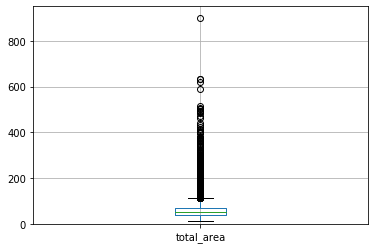

In [96]:
# определяем range (границы) для будущей гистрограммы -> построим box and whisker plot для определения выбросов

plt.ylim(0, 950) # огранчим график величиной, чуть больше мах (900 кв м)
df.boxplot(column='total_area') 

<font color='orange'><b>🙊 Наблюдения 11</b></font>

Видно, что после 130- 150 много выбросов -> range сделаем до 200

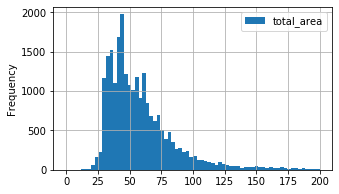

In [97]:
df.plot(y = 'total_area', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,200))

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> 
    
Для гистрограмм:
    
    df.plot(y = 'total_area', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,200))
    plt.title("Гистограмма распределения площади квартир")
    plt.xlabel("Площадь квартиры, кв. м")
    plt.ylabel("Частота")
    plt.show()
    
Для box and whisker plot (pandas ans seaborn):
    
    df.boxplot(column='total_area').set_ylabel('Площадь квартиры, кв.м')
    plt.title("Диаграмма размаха для площади квартир")
    plt.show()
    
Для pie:
    
    plt.pie(stat_rooms, labels=rooms_name, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title("Распределение количества комнат в квартирах")
    plt.show()
    
Для точечной диаграммы:
    
    tot_area_vs_price.plot(y = 'median', style = 'o', grid=True)
    plt.title("Точечная диаграмма зависимости стоимости квартиры от ее площади")
    plt.xlabel("Площадь квартиры, кв. м")
    plt.ylabel("Стоимость квартиры, руб")
    plt.show()
    
Для линейной диаграммы:
    
    rooms_vs_price.plot(y = 'median', style = '-o', grid=True)
    plt.title("Зависимость стоимости от количества комнат в квартире")
    plt.xlabel("Количество комнат, шт")
    plt.ylabel("Стоимость квартиры, руб")
    plt.show()
    
Дальше меняем названия в зависимости от данных.
    
</div>

<font color='orange'><b>🙊 Наблюдения 11.1</b></font>

Распределение похоже на нормальное.  
Метраж большиснтва квартир - 30 - 75 кв м.

#### Гистограмма цены

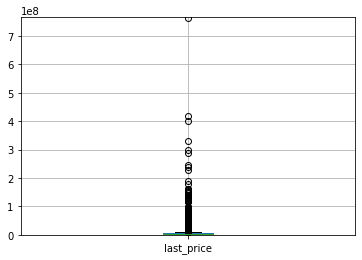

In [98]:
# сначала нужно определиться с range (границы) для будущей гистрограммы -> построим box and whisker plot для определения выбросов

plt.ylim(0, 765000000) # огранчим график величиной, чуть больше мах (763000000)
df.boxplot(column='last_price') 

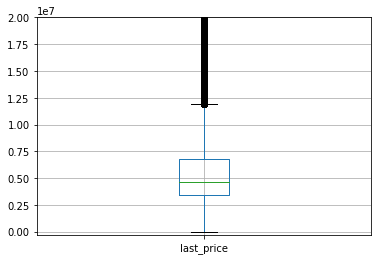

In [99]:
# график совсем непонятный, уменьшим верхний предел графика с 765000000 до 20000000, а нижний -
# с 0 до -300000 (для наглядоности усов))

plt.ylim(-300000, 20000000)
df.boxplot(column='last_price') 

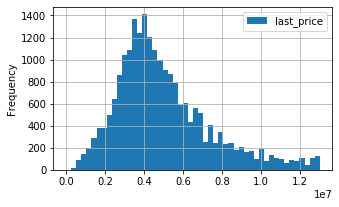

In [100]:
df.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,13000000))

<font color='orange'><b>🙊 Наблюдения 12.1</b></font>

Распределение так же похоже на нормальное.  
Цена за большиснтво квартир - от 3 до 7 млн

#### Гистрограмма и круговая диаграмма числа комнат

<font color='orange'><b>🙊 Наблюдения 13</b></font>

Мне кажется, для такого числа комнат (до 6 шт например) показательнее делать круговую диаграмму (pie).

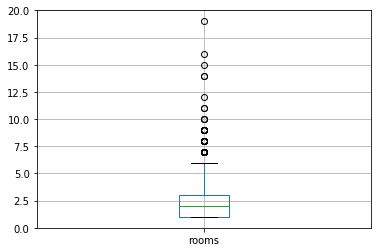

In [101]:
# строим box and whisker plot для определения выбросов

plt.ylim(0, 20) # огранчим график величиной, чуть больше мах (19 комнат)
df.boxplot(column='rooms')

<font color='orange'><b>🙊 Наблюдения 13.1</b></font>

Видно, что после 6 много выбросов -> range сделаем до 6

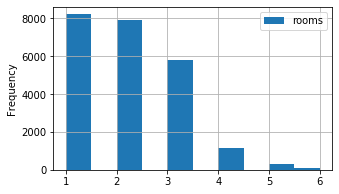

In [102]:
# посмотрим распределение по гистрограмме

df.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (1,6))

In [103]:
# сделаем Series для круговой диаграммы до 4 комнат, так как по гистрограмме видно, что комнат больше 4-х очень мало

rooms_data = df.query('rooms <= 4')
rooms_data = rooms_data['rooms']
stat_rooms = rooms_data.value_counts()

# check
stat_rooms

1    8207
2    7910
3    5792
4    1177
Name: rooms, dtype: int64

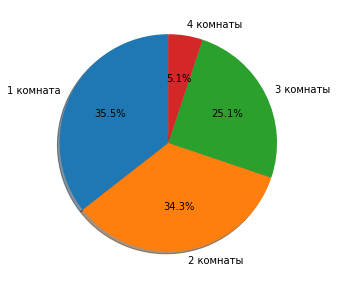

In [104]:
rooms_name = ["1 комната", "2 комнаты", "3 комнаты", "4 комнаты"]

fig = plt.figure(figsize =(5, 5))
plt.pie(stat_rooms, labels=rooms_name, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

<font color='orange'><b>🙊 Наблюдения 13.2</b></font>

Большинство квартир имеют 1-2 комнаты.

#### Гистограмма высоты потолков

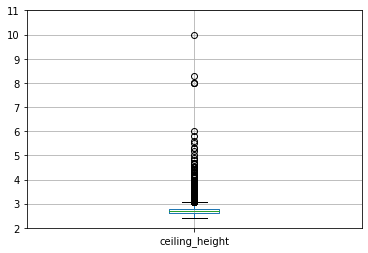

In [105]:
# строим box and whisker plot для определения выбросов

plt.ylim(2, 11) # огранчим график величиной, чуть больше мах (10)
df.boxplot(column='ceiling_height') 

<font color='orange'><b>🙊 Наблюдения 14</b></font>

Видно, что после ~3.5 много выбросов -> range сделаем до 4

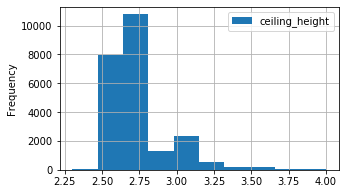

In [106]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (2.3,4))

<font color='orange'><b>🙊 Наблюдения 14.1</b></font>
  
Высота потолков большинства квартир - от 2.5 - 2.8 м.

### Изучите время продажи квартиры

#### Гиcтограмма времени продажи квартир

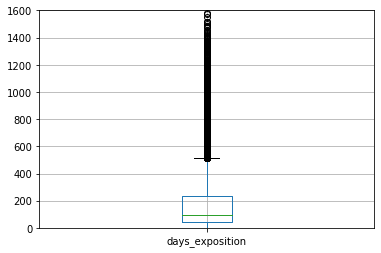

In [107]:
# посмотрим на range (размах)

plt.ylim(0, 1600) # огранчим график величиной, чуть больше мах (1580)
df.boxplot(column='days_exposition') 

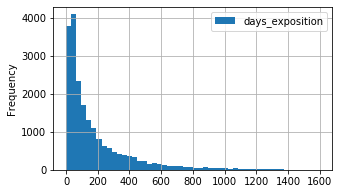

In [108]:
# огранчим график величиной, чуть больше мах (1580)

df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,1600))

<font color='orange'><b>🙊 Наблюдения 15</b></font>

Похоже на распределение Пуассона.
Можно ограничить гистограмму до 600.

#### Среднее и медиана

In [109]:
# посмотрим на среднее значение и медиану

print(f"Медиана {df['days_exposition'].median()}")
print(f"Среднее {round(df['days_exposition'].mean(), 2)}")

Медиана 95.0
Среднее 180.91


#### Cколько обычно занимает продажа? 

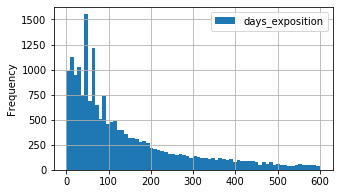

In [110]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,600))

<font color='orange'><b>🙊 Наблюдения 15.1</b></font>

Данные говорят, что продажа квартир занимает до 500 дней.  
Видны выбросы до 100 дней, давайте приблизим.

#### Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

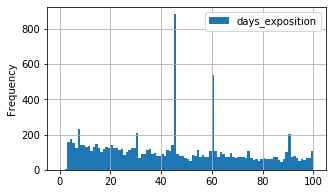

In [111]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))

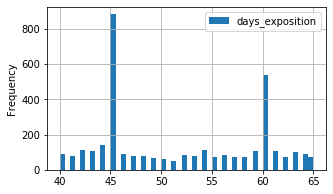

In [112]:
# посмотрим, что между 40 и 65

df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (40,65))

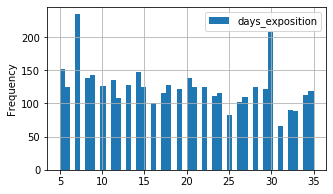

In [113]:
# посмотрим, что между 5 и 35

df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (5,35))

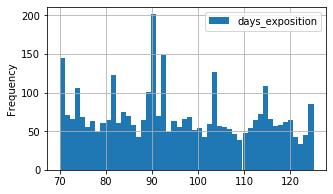

In [114]:
# посмотрим, что между 70 и 100

df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (70,125))

<font color='orange'><b>🙊 Наблюдения 15.2</b></font>

Видно, два больших пика - 45 дней и 60. Есть еще пики на 7, 30 и 90 дней. Именно в эти дни, были сняты (не факт что проданы!) большинство квартир с платформы. Такая закономернсть выглядит подозрительно.

На сайте Яндекс_Недвижимость нашла следующие сроки публикаций.   

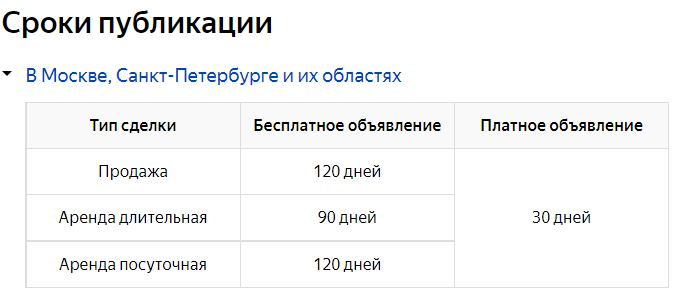

<font color='orange'><b>🙊 Наблюдения 15.3</b></font>

Возможно, система каждые n дней (7/30/45/60/90/120/n+30) проверяет/спрашивает, актуально ли объявление. Если нет - снимает с продажи. Учитывая, что бесплатное объявление может держаться до 120 дней, то человеку нет смысла тратить время на заполнение данных в Яндекс_Недвижимости.  
А значит, до 120 дней нет уверенности, что выбросы - не работа системы, а реальные продажы. Значит 7-ой, 45-ый, 60-ый и 90-ый день нужно удалить.

Ответ на вопрос "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"  
Можно говорить, что обычно продажа недвижимости занимает 3 месяца (95 дней). 
Думаю, что сделки, которые были закрыты за 30 дней (месяц) могут оказаться мошеничеством.     
Так же аномально долгими можно считать сделки, которые закрывались после 451 дней (75% + std).

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#### Особенности редких и выбивающихся значений для days_exposition

In [115]:
# для того, чтобы данные павильно читались, нужно поменять тип данных с float на int, но для этого 
# заменим сначала пустые данные нулем

df.loc[df['days_exposition'].isna(), 'days_exposition'] = 0
df['days_exposition'] = df['days_exposition'].astype('int')

# check
df[df['days_exposition']!=0]['days_exposition'].describe()

count    20434.000000
mean       180.905843
std        219.717326
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [116]:
# делаем новый df

data = df.loc[~df['days_exposition'].isin([45, 30, 90, 60, 7, 0])]

#check
data['days_exposition'].describe()

count    18373.000000
mean       195.873401
std        226.762177
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

<font color='orange'><b>🙊 Наблюдения 15.4</b></font>

Теперь мы видим следущее:
Стандартное время продажи - почти 4 месяца (114 дней).   
Быстрые сделки - до 30 дней (месяц) кажется еще более верным.  
Аномально долгие сделки - после 485 дней.

Так как мы убрали несколько значений, то в очищенных данных получаем медиану и среднее иное, чем было в неочищенных:

| Данные | Медиана |Среднее|
|--------|---------|-------|
|  df    |   95    | 180.9 |
|  data  |   114   | 195.9 |

(-10, 800)

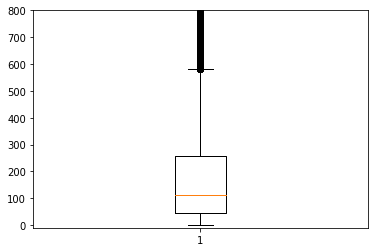

In [117]:
# посмотрим выбросы

plt.boxplot(data['days_exposition'])
plt.ylim(-10,800)

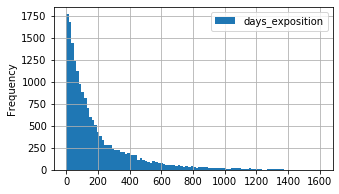

In [118]:
# строим гистрограмму с очищенными данными

data.plot(y = 'days_exposition', kind = 'hist', bins = 100, figsize = (5,3), grid=True, range = (1,1600))

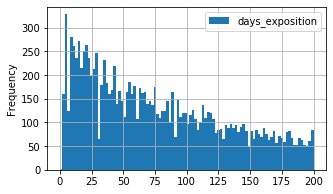

In [119]:
# посмотрим поближе

data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))

<font color='orange'><b>🙊 Наблюдения 15.5</b></font>

Так же видим, что теперь range изменился с 500 до 600.

<font color='orange'><b>🙊 Наблюдения 16</b></font>

У меня еще была мысль, укоротить все данные до +/-3 sigma, но тогда изменятся статистические данные и я решила, что этого делать не надо.

### Факторы влияния на стоимость квартиры

#### Карта корреляции
https://pythonru.com/biblioteki/seaborn-plot

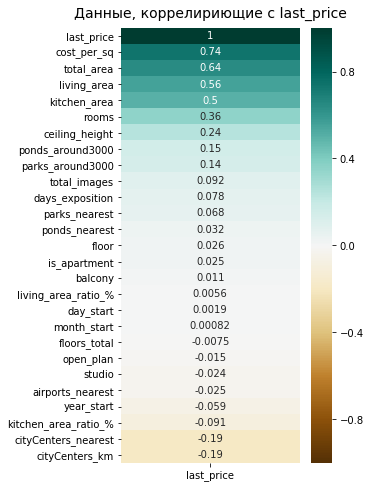

In [120]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Данные, коррелириющие с last_price', fontdict={'fontsize':14}, pad=10);

<font color='orange'><b>🙊 Наблюдения 17</b></font>

Что можно сказать, проанализировав карту:  
- нет коэффициента, больше чем 0.7 (не берем в расчет cost_per_sq, так как он рассчитывался по last_price), а значит ни один из параматров не связан с ценой строго линейно.  
- наибольшее влияние дает общая площадь, связанная с жилая площадь и площадь кухни. Так же количество комнат и высота потолков вносят свой маленький вклад. Можно говорить о общей тенденции, что чем выше эти значения, тем выше цена.
- так же обратное влияние оказывает удаленность от центра: чем дальше от центра, тем цена ниже.  
- все остальные параматры слабо влияют на цену.  

Проверим эти выводы.

#### Зависимость цены от площади

In [121]:
# строим сводную таблицу для total_area и last_price

tot_area_vs_price = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
tot_area_vs_price.columns = ['mean', 'median', 'count']
#tot_area_vs_price.sort_values('median', ascending = True).head()

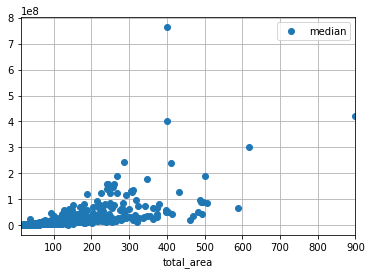

In [122]:
# строим точечную дуиграмму

tot_area_vs_price.plot(y = 'median', style = 'o', grid=True)

In [123]:
# проверем коэфф корреляции (коэффициент Пирсона)

data['total_area'].corr(df['last_price'])

0.6433381913717938

<font color='orange'><b>🙊 Наблюдения 18</b></font>

Коэфф Пирсона 0.64, который показывает, что есть не сильная зависимость между ценой и общей площадью квартиры.  
Видна общая тенденция, что чем больше площадь, тем выше цена (хотя есть и выпадающие точки).

#### Зависимость цены от числа комнат

In [124]:
# строим сводную таблицу для rooms и last_price

rooms_vs_price = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
rooms_vs_price.columns = ['mean', 'median', 'count']
#rooms_vs_price.sort_values('mean', ascending = True).head()

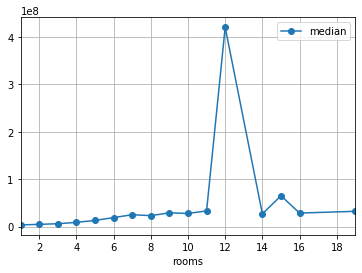

In [125]:
# так как точек немного, вполне можно построить просто прямую линию

rooms_vs_price.plot(y = 'median', style = '-o', grid=True)

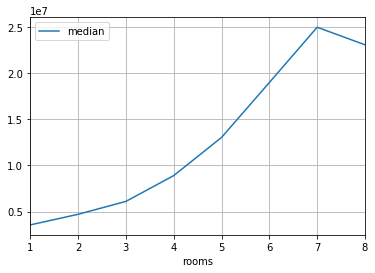

In [126]:
# есть сильно выпадающие точки (которые скорее всего единичны), которые мешают анализу 
# выкинем их

rooms_vs_price.query('count > 3').plot(y = 'median', grid=True)

In [127]:
# проверем коэфф корреляции (коэффициент Пирсона)

data['rooms'].corr(df['last_price'])

0.355895120399902

<font color='orange'><b>🙊 Наблюдения 19</b></font>

Коэфф Пирсона еще меньше, чем у total_price vs total_area, но здесь тенденция видна ярче - чем больше комнат -> тем больше цена. Правда это работает лишь для квартир до 7 квартир -> дальше цена понижается. Возможно, потому что такие квартиры маловостребованы из-за цены или огромной площади. А мб это коммуналки, которые в оч плачевном состоянии.  

#### Зависимость цены от удалённости от центра

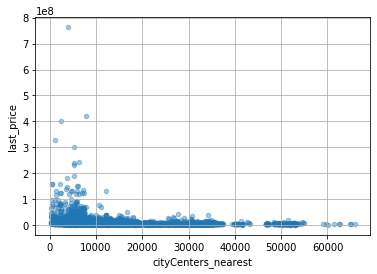

In [128]:
data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha=0.4, grid=True)

In [129]:
data['cityCenters_nearest'].corr(df['last_price'])

-0.19019747614980198

<font color='orange'><b>🙊 Наблюдения 20</b></font>

Коэфф Пирсона отрицательный, что говорит об обратной зависимости параметров: чем больеш цена, тем меньше расстояние до центра.

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

<font color='orange'><b>🙊 Наблюдения 21</b></font>

Так как тут всего лишь три значения, то мне кажется удобно использовать box and whiskers plot.  
P.S. Нашла только в seaborn как строить подходящий график.

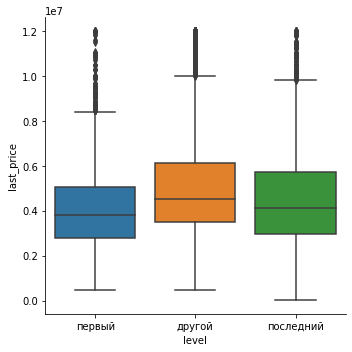

In [130]:
# для лучшего отображения ограничим цену до 12 млн

data_12mln = data.query('last_price <= 12000000')
sns.catplot(x='level', y="last_price", kind="box", data=data_12mln)

<font color='orange'><b>🙊 Наблюдения 21.1</b></font>

Цены на квартиры на первом и последнем этаже ниже, чем на других этажах. Квартиры на первом этаже - самые дешевые.

#### Зависимость цены от даты размещения: дня недели, месяца и года

##### день недели

In [131]:
# строим сводную таблицу для day и last_price

days_vs_price = data.pivot_table(index = 'day_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price.columns = ['mean', 'median', 'count']

(4400000, 4700000)

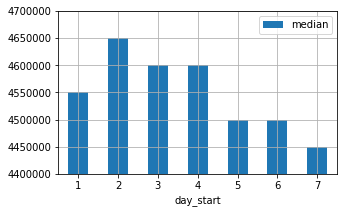

In [132]:
days_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4400000, 4700000)

# можно и линейный график построть, но мне нравится bar
# days_vs_price.plot(y = 'median', grid=True)

<font color='orange'><b>🙊 Наблюдения 22</b></font>

Наибольшая цена ставится для квартир, которые выставляются во вторник, наименьшая - в воскресенье;  
Видна тенденция, что в будни цены выше, чем в выходные. 
Думаю, это может быть связано с особенностью человека- в рабочие дни человек более собран и целеустремлен, а ближе к выходным более расслаблен и готов идти на уступки.

##### месяц

In [133]:
# строим сводную таблицу для month и last_price

month_vs_price = data.pivot_table(index = 'month_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
month_vs_price.columns = ['mean', 'median', 'count']

(4400000, 4750000)

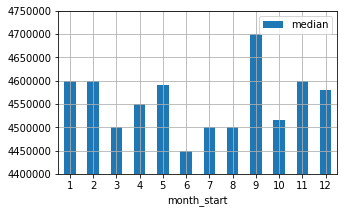

In [134]:
month_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4400000, 4750000)

<font color='orange'><b>🙊 Наблюдения 23</b></font>

Наибольшая цена в сентябре, наименьшая - в июне;   
Не сильна я в рынке недвижимости.. Порассуждаем:
Медиана цены плюс-минус одинаковая для октября, ноября, декабря, января и февраля; марта, апреля и мая; с июня по август.  Похоже на сезоны: осень - зима, весна и лето. Можно предположить, что есть сезонность.  
Сентябрь - время после отпусков, люди отдохнули и готовы работать. Летом все в отпусках, поэтому спроса мало и цены падают. Ближе к Новому году все немного оживает - пора покупать подарки к Новому году или начинать год с чистого листа.  
Так же думаю, что не всегда квартиры сразу готовы к заселению новых жильцов. Сначала нужно сделать ремонт. За зиму как раз можно это провернуть и весной заезжать, да и перевозить вещи гораздо проще (и теплее).

##### год

In [135]:
# строим сводную таблицу для year и last_price

year_vs_price = data.pivot_table(index = 'year_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
year_vs_price.columns = ['mean', 'median', 'count']

(4000000, 8000000)

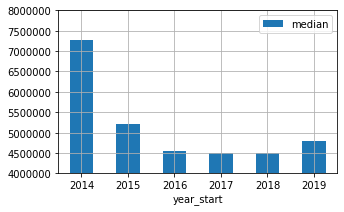

In [136]:
year_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(4000000, 8000000)

<font color='orange'><b>🙊 Наблюдения 24</b></font>

Cамые дорогие квартиры были в 2014 году, самые дешевые - 2017 год, дальше все опять пошло на вырост;  
Нуу тут могу предположить, что после анексии Крыма, была паника и рубль стал менее устойчив, отсюда повышение цен.

Присмотримся к 2014 году:

(5500000, 15000000)

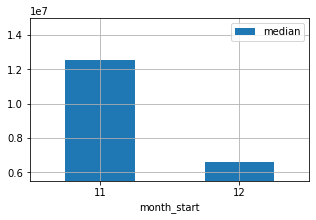

In [137]:
data_2014 = data.query('year_start == 2014')

d14_vs_price = data_2014.pivot_table(index = 'month_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
d14_vs_price.columns = ['mean', 'median', 'count']

d14_vs_price.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(5500000, 15000000)

<font color='orange'><b>🙊 Наблюдения 24.1</b></font>

Данных совсем немного (всего за два месяца), это может искажать картину.   
По графику курса доллара 2014 года (http://kurs-dollar-euro.ru/dollar-2014.html), самый пик нестабильности выпал на декабрь, что можно связать с резким падением на нашем графике d14_vs_price: люди начали в панике с сентября скупать все что могли, но когда рубль достиг максимума -> возможности резко упали, а с ними и спрос.

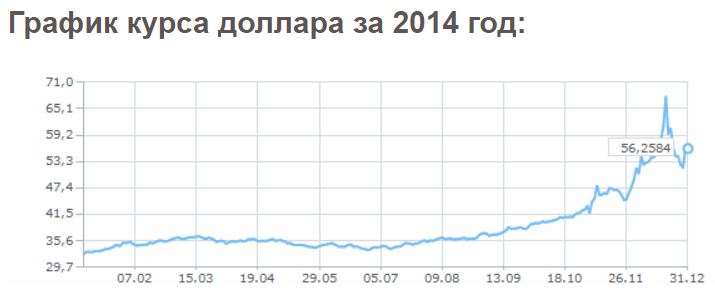

### Вывод

Стандратное объявление выглядит так:  
квартира площадью ~ 50 кв.м, ценой в ~ 4 млн, 1-комнатная, с высотой потолков ~ 2.7 м, продается за 6 месяцев.

На стоимость квартиры влияет прямопропорционально площадь квартиры ( а значит и жилая площадь с кухней), количество комнат и этаж. Обратнопропорционально влияет удаленность от центра.

Так же, если квартира будет выставлена в будний день в начале осени, она скорее всего будет стоить больше, нежели такая же квартира, выставленная в выходной день летом. Ну и не хочу никого расстраивать, но цены плосле 2019 года будут только расти (ну вы и сами знаете 😢)

- - - - - - - - -  -

### 10 населённых пунктов с наибольшим числом объявлений

#### Средняя цена квадратного метра в этих населённых пунктах

In [138]:
# делаем сводную таблицу

local_vs_sq_price = data.pivot_table(index = 'locality_name', values = 'cost_per_sq', aggfunc = ['mean', 'count'])
local_vs_sq_price.columns = ['Средняя цена за кв.м', 'Число объявлений']
local_top10 = local_vs_sq_price.sort_values('Число объявлений', ascending = False).head(10)

# приводим к красивому виду

local_top10['Средняя цена за кв.м'] = round((local_top10['Средняя цена за кв.м'] / 1000), 2)
local_top10.columns = ['Средняя цена за кв.м, тыс', 'Число объявлений']
local_top10.sort_values('Средняя цена за кв.м, тыс', ascending = False)

,"Средняя цена за кв.м, тыс",Число объявлений
locality_name,,
Санкт-Петербург,112.37,12384
Пушкин,102.69,283
деревня Кудрово,92.23,265
посёлок Парголово,89.78,261
посёлок Мурино,85.57,468
посёлок Шушары,78.05,358
Колпино,75.15,273
Всеволожск,68.61,305
Гатчина,67.32,241


####  Населённые пункты с самой высокой и низкой стоимостью жилья
Эти данные можно найти по имени в столбце locality_name..

In [139]:
# населенный пункт с самой низкой стоимостью за кв.м

local_vs_sq_price[local_vs_sq_price["Средняя цена за кв.м"] == local_vs_sq_price["Средняя цена за кв.м"].min()]

,Средняя цена за кв.м,Число объявлений
locality_name,,
деревня Старополье,11309.35,2


In [140]:
# населенный пункт с самой высокой стоимостью за кв.м

local_vs_sq_price[local_vs_sq_price["Средняя цена за кв.м"] == local_vs_sq_price["Средняя цена за кв.м"].max()]

,Средняя цена за кв.м,Число объявлений
locality_name,,
Санкт-Петербург,112368.852269,12384


<font color='orange'><b>🙊 Наблюдения 25</b></font>

Разница между ценой за кв.метр в Санкт-Петербурге и в деревне Старополье отличается почти в 10 раз!

- - - - - - - - -  -

### Изучите предложения квартир

для каждой квартиры есть информация о расстоянии до центра.   
Выделите квартиры в Санкт-Петербурге (locality_name).   
Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [141]:
# создаем новый df для Санкт-Петербурга
sp_local = data.query('locality_name == "Санкт-Петербург" and cityCenters_km.isna() == False')

# check
sp_local.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_per_sq,day_start,month_start,year_start,level,living_area_ratio_%,kitchen_area_ratio_%,cityCenters_km
2,10,5196000,56.0,2015-08-20,2,2.79,5,34.3,4,False,...,574.0,558,92785.7,4,8,2015,другой,61.2,14.8,14.0
3,0,64900000,159.0,2015-07-24,3,2.73,14,NaN,9,False,...,234.0,424,408176.1,5,7,2015,другой,NaN,NaN,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000.0,2,6,2018,другой,32.0,41.0,8.0


In [142]:
# делаем сводную таблицу, чтоб построить график по среднему

km_vs_price = sp_local.pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc = 'mean')
km_vs_price.columns = ['mean']

(0, 20)

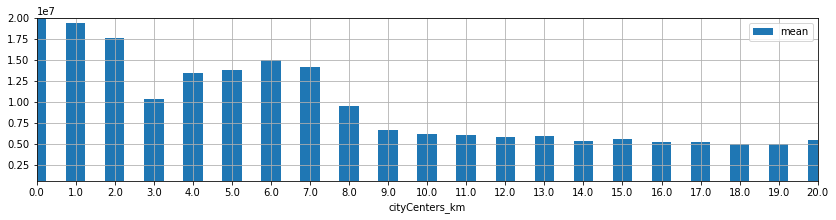

In [143]:
# строим bar plot, так как он более наглядынй для резких перепадов
#km_vs_price.plot(y = 'mean', figsize = (14,3), grid=True, rot=0)

km_vs_price.plot(y = 'mean', kind = 'bar', figsize = (14,3), grid=True, rot=0)

plt.ylim(600000, 20000000)
plt.xlim(0, 20)

<font color='orange'><b>🙊 Наблюдения 26</b></font>

Видно две резкие точки: 3 км и 8 км. Возможно, есть районы в радиусе 3 км, где дома старые (возможно аварийные) и цены у таких квартир низкие. Для центра ситуация с домами 18-го/19-го века, которые не ремонтируются, вполне актуальна. Второй вариант - есть дома, дальше 3 км, которые очень элитные и , соответственно, квартиры там дорого стоят.

Еще, как мы помним, в пункте 3.7, все строки, где удаленность была больше 17 км, мы переносили в статус Лен. области. Сейчас, я вижу, что в Питере есть такие далекие значения. Это странно, нужно будет найти людей, которые собирали данные и узнать у них об этом поподробнее.

Будем брать центр включительно до 8 км.

In [144]:
# новый df

df_center = sp_local.query('cityCenters_km <= 8')

- - - - - - - - -  -

### Cегмент квартир в центре

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).   Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

#### Площадь в центре

In [145]:
df_center["total_area"].describe()

count    3179.000000
mean       87.947927
std        57.964429
min        12.000000
25%        53.000000
50%        74.100000
75%       103.200000
max       900.000000
Name: total_area, dtype: float64

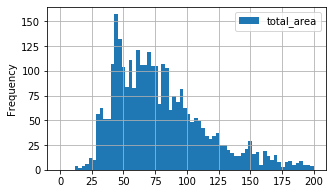

In [146]:
# огранчим график величиной 75% + std ( 87 + 103 = 200)

df_center.plot(y = 'total_area', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,200))

<font color='orange'><b>🙊 Наблюдения 27</b></font>

Распределение все еще похоже на нормальное.  
Метраж большинства квартир изменился: с - 30 - 75 кв.м на от 50 до 100 кв.м. 

#### Цена в центре

In [147]:
df_center["last_price"].describe()

count    3.179000e+03
mean     1.370280e+07
std      2.496233e+07
min      1.600000e+06
25%      6.200000e+06
50%      8.500000e+06
75%      1.298500e+07
max      7.630000e+08
Name: last_price, dtype: float64

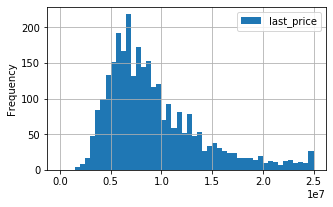

In [148]:
# огранчим график величиной 75% + std (25000000)

df_center.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range = (0,25000000))

<font color='orange'><b>🙊 Наблюдения 28</b></font>

Распределение так же все еще похоже на нормальное.  
Цена за большиснтво квартир изменилась: - от 3 до 7 млн -> 5 - 10 млн
Так же вырос верхний предел стоимости: с 12.5 млн до 25 млн, что говорит о повышении цен на квартиры

#### Число комнат в центре

In [149]:
data_room = df_center.query('rooms <= 4')
data_room = data_room['rooms']
stat_rooms_center = data_room.value_counts()

# check
stat_rooms_center

3    981
2    976
1    551
4    397
Name: rooms, dtype: int64

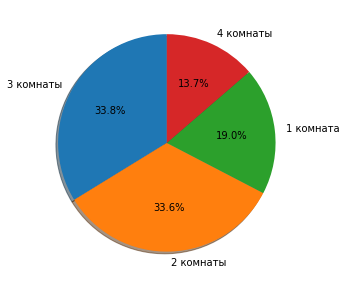

In [150]:
rooms_name = ["3 комнаты", "2 комнаты", "1 комната", "4 комнаты"]

fig = plt.figure(figsize =(5, 5))
plt.pie(stat_rooms_center, labels=rooms_name, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

<font color='orange'><b>🙊 Наблюдения 29</b></font>

Количество комнат для центра больше: тут преобладают 3-х и 2-комнатные квартиры, да и 4-х комнатных больше (13.7% против 5.1%). Раньше преобладали 1 или 2 комнаты в квартирах.

#### Высота потолков в центре

In [151]:
df_center["ceiling_height"].describe()

count    3179.000000
mean        2.976581
std         0.350446
min         2.400000
25%         2.750000
50%         2.950000
75%         3.120000
max        10.000000
Name: ceiling_height, dtype: float64

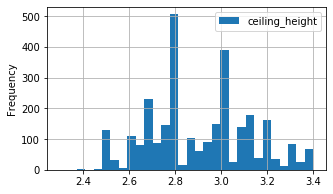

In [152]:
df_center.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (2.3,3.4))

<font color='orange'><b>🙊 Наблюдения 30</b></font>
  
Высота потолков большинства квартир чуть увеличилась: от 2.5 - 2.8 м -> от 2.75 - 3.2 м.

#### Карта корреляции для центра

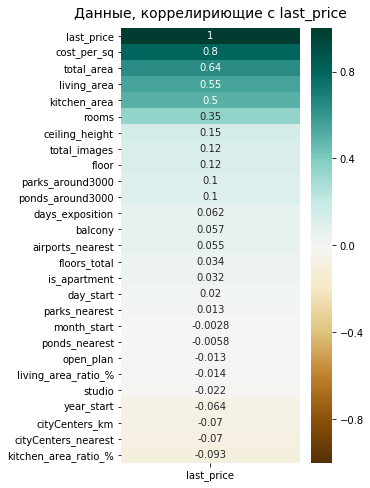

In [153]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Данные, коррелириющие с last_price', fontdict={'fontsize':14}, pad=10);

<font color='orange'><b>🙊 Наблюдения 31</b></font>

Я не вижу сильных изменений для центра:  
- все так же нет коэффициента, больше, чем 0.7  
- все так же наибольшее влияние дает общая площадь, жилая площадь и площадь кухни. Так же не забываем про количество комнат. А вот влияние высоты потолков уменьшилось с  0.24 до 0.15. 
- коэффициент для удаленности от центра стал еще менее влиятельным: уменьшился с 0.19 до 0.07 (было бы странно, если б он увеличился)

#### Зависимость от числа комнат

In [154]:
# строим сводную таблицу для rooms и last_price

rooms_vs_price_center = df_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
rooms_vs_price_center.columns = ['mean', 'median', 'count']

(5000000, 27000000)

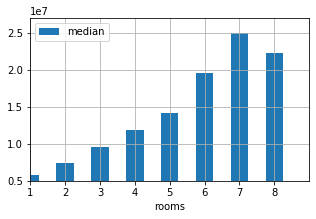

In [155]:
# сразу выкидываем выпадающие точки и строим в этот раз bar plot

rooms_vs_price_center.query('count > 3').plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.xlim(0, 8)
plt.ylim(5000000, 27000000)

(5000000, 27000000)

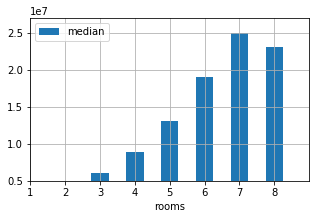

In [156]:
# сравним с данными из пункта 4.4.3 ( в тех же границах для наглядности)

rooms_vs_price.query('count > 3').plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.xlim(0, 8)
plt.ylim(5000000, 27000000)

<font color='orange'><b>🙊 Наблюдения 32</b></font>

Видим, что тенденция сохраняется - чем больше комнат, тем выше цена (заканчивая 7-ой). Так же можно заметить, что цены 1- 5-ти комнатной квартиры выше для центра, а вот начиная с 6 комнат цена почти одинаковая что в центре, что по всей выборке. 

<font color='orange'><b>🙊 Наблюдения 32.1</b></font>

У меня возникла проблема: я хотела бы соеденить эти данные в один график (для наглядности), но не смогла найти, как это сделать. Мб у Вас есть подсказки/ссылки?

#### Зависимость от удаленности от центра

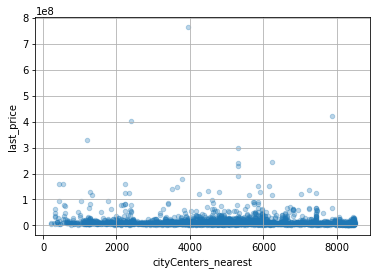

In [157]:
df_center.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha=0.3, grid=True)

<font color='orange'><b>🙊 Наблюдения 33</b></font>

Как я и говорила раньше, зависимость практически не видна. Этого и следовало ожидать, так как выборка и так по центру.  
Давайте попробуем посмотреть по bar plot.

In [158]:
km_vs_price_center = df_center.pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc = 'mean')
km_vs_price_center.columns = ['mean']

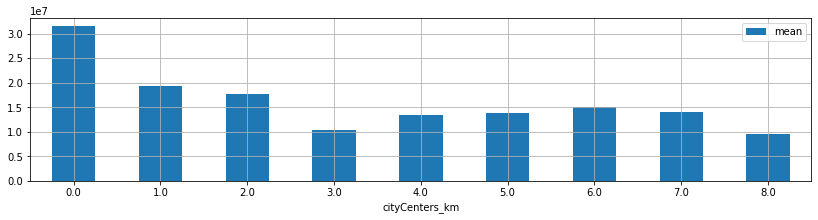

In [159]:
km_vs_price_center.plot(y = 'mean', kind = 'bar', figsize = (14,3), grid=True, rot=0)

<font color='orange'><b>🙊 Наблюдения 33.1</b></font>

В принципе видим, что чем дальше от центра (м. Адмиралтейская), тем цена ниже.

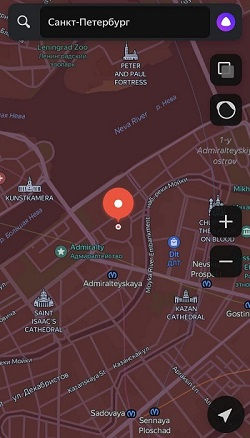

#### Зависимость от этажа квартиры

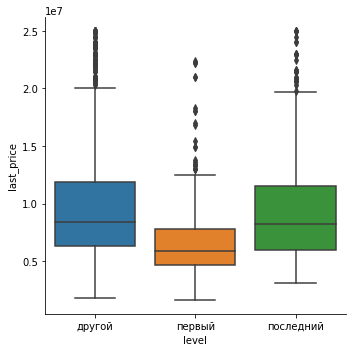

In [160]:
# для лучшего отображения ограничим цену до 25 млн

data_25mln = df_center.query('last_price <= 25000000')
sns.catplot(x='level', y="last_price", kind="box", data=data_25mln)

<font color='orange'><b>🙊 Наблюдения 34</b></font>

Теперь стало еще сильнее видно, что первый этаж не очень любят - цена (а значит и спрос) на такие квартиры низкий.
Интересно, что старт цены теперь выше для последнего этажа, да и сказала бы что верхняя цена почти равна цене "другого" этажа.

#### Зависимость от даты размещения объявления

##### день недели

In [170]:
# строим сводную таблицу для day и last_price

days_vs_price_center = df_center.pivot_table(index = 'day_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
days_vs_price_center.columns = ['mean', 'median', 'count']

(7850000, 9000000)

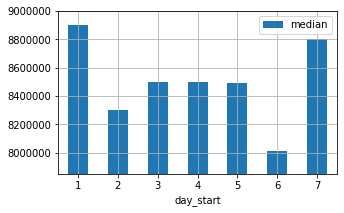

In [162]:
days_vs_price_center.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(7850000, 9000000)

<font color='orange'><b>🙊 Наблюдения 35</b></font>

Тут ситуация тоже поменялась относительно старой выборки:  
- самые высокие цены - понедельник и вс, минимальные - сб.  
В среднем, тенденция сохраняется старая - цены выше в будни.

##### месяц

In [163]:
# строим сводную таблицу для month и last_price

month_vs_price_center = df_center.pivot_table(index = 'month_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
month_vs_price_center.columns = ['mean', 'median', 'count']

(7500000, 9100000)

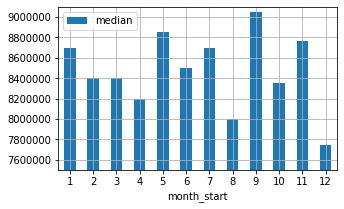

In [164]:
month_vs_price_center.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(7500000, 9100000)

<font color='orange'><b>🙊 Наблюдения 36</b></font>

Здесь помеялось, но не сильно:  
Наибольшая цена в сентябре (как и прежде), наименьшая - в январе и августе;   
Сезонность, как по мне, еще просматривается.
По поводу января - возможно, под Новый год никто не хочет работать 🐼

##### год

In [165]:
# строим сводную таблицу для year и last_price

year_vs_price_center = df_center.pivot_table(index = 'year_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
year_vs_price_center.columns = ['mean', 'median', 'count']

(6000000, 18000000)

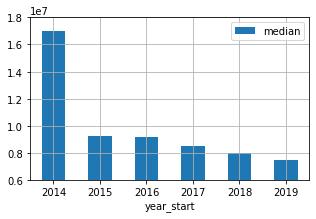

In [166]:
year_vs_price_center.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(6000000, 18000000)

<font color='orange'><b>🙊 Наблюдения 37</b></font>

Cамые дорогие квартиры так же были в 2014 году, самые дешевые - 2019 год (это интересно!).
Возможно в центре уже негде строить, и вся стройка ушла за него и, соответсвенно, квартиры вне центра диктуют общую тенденцию.  
Яркой зависимости, как для старой сборки, я не вижу.

Присмотримся к 2014 году:

(16000000, 17300000)

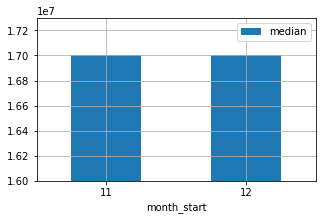

In [167]:
data_2014_center = df_center.query('year_start == 2014')

d14_vs_price_center = data_2014_center.pivot_table(index = 'month_start', values = 'last_price', aggfunc = ['mean', 'median', 'count'])
d14_vs_price_center.columns = ['mean', 'median', 'count']

d14_vs_price_center.plot(y = 'median', kind = 'bar', figsize = (5,3), grid=True, rot=0)
plt.ylim(16000000, 17300000)

<font color='orange'><b>🙊 Наблюдения 37.1</b></font>

Цены стабильно высокие в течении двух месяцев (для старых данных вид немного другой). 
Центр всегда желаем, так как есть вся необходимая инфраструктура рядом, ну и про виды не забываем -> возможно, поэтому люди не снижали цены.

#### Cколько обычно занимает продажа? 

In [168]:
df_center["days_exposition"].describe()

count    3179.000000
mean      257.883297
std       277.205603
min         3.000000
25%        61.000000
50%       156.000000
75%       364.000000
max      1572.000000
Name: days_exposition, dtype: float64

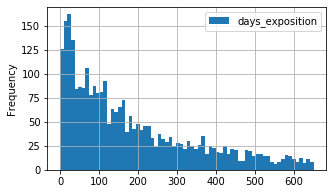

In [169]:
df_center.plot(y = 'days_exposition', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0,650))

<font color='orange'><b>🙊 Наблюдения 38</b></font>

Данные говорят, что продажа квартир занимает до 640 дней, что немного больше количесва дней для старой выборки.  

### Вывод

Отличия есть, но зависимость от некотрых параметров сохраняется.  

Стандратное объявление для центра выглядит так:  
квартира площадью ~ 75 кв.м, ценой в ~ 8.5 млн, с тремя комнатами, с высотой потолков ~ 2.7 м (как и было раньше), продается за ~ 9 месяцев.

На стоимость квартиры влияет прямопропорционально площадь квартиры ( а значит и жилая площадь с кухней), количество комнат и этаж. Обратнопропорционально влияет удаленность от центра.

Так же, если квартира будет выставлена в будний день в начале осени, она скорее всего будет стоить больше, нежели такая же квартира, выставленная в выходной день летом.

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Общий вывод

Параметры, которые влияют на рыночную стоимость квартиры:  
- конечно же цена за квадратный метр (но так как он рассчитывается из цены и общей площади, странно его вспоминать, но пусть будет)  
- общая площадь квартиры  
- вытекающие из нее площадь кухни и жилая площадь  
- количество комнат  
- удаленность от центра  
- так же влияет этаж квартиры - в среднем на первом этаже самые дешевые квартиры  

Все эти параметры вносят каждый свою небольшую лепту, возможно система сможет объединить их так, чтобы корреляция была более выражена. 

Еще можно заметить, что если объявление было вылежено в сентябре в будний день, оно будет дороже.
Так же стандартное время продажи - до 600 дней.

Наибольшая цена будет в Санкт-Петербурге, наименьшая - в деревне Старополье.

Признаки аномалии и мошеннической деятельности для будущей системы:  
- сделка, которая была закрыта в течении 30 дней - подозрительно быстро  
- сделка, которая была не закрыта после 650 дней - подозрительно долго
- общая площадь квартиры больше 200 кв. м  и меньше 6 кв м
- жилая площадь меньше 6 кв. м
- площадь кухни меньше 5 кв. м
- высота потолков больше 4 м и меньше 2.4 м для стандартных квартир  
- количество комнат больше 8 и меньше 1
- квартира в Санкт-Петербурге с удаленностью от центра больше 17 км 
- цена для Питера - больше 25 млн, дальше - больше 13 млн